# Case Study- Lending Club  

In [526]:
# Problem Statement

#Lending Club is a finance company that provides various loans to city customers. 
#The company has a major issue with its loan approval process. 
#They need to make smart decisions to avoid losing money, especially from "risky" borrowers.

#These losses, known as credit losses, occur when borrowers fail to repay their loans. 
#Borrowers who don't repay are called "charged-off" and cause the most significant losses.

#The main goal of this task is to help Lending Club reduce these credit losses. There are two main challenges:

#1. It's important to identify good borrowers who will repay their loans because they generate profit through 
#   interest payments. If these borrowers are rejected, the company misses out on potential business.
#2. Approving loans for borrowers who might not repay and could default results in substantial financial losses 
#   for the company.


## Import libraries

In [527]:
# Numerical and Data Analysis 
import numpy as np 
import pandas as pd 

# Data Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Extra - To Suppress warnings 
import warnings 
warnings.filterwarnings('ignore')

### Loading data from loan CSV

In [528]:
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Analyze the dataset shape - Rows count, Columns

In [529]:
loan_df.shape

(39717, 111)

In [530]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [531]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Checking for null values in the dataset

In [532]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [533]:
loan_df.nunique().sort_values()

verification_status_joint        0
bc_util                          0
bc_open_to_buy                   0
avg_cur_bal                      0
acc_open_past_24mths             0
                             ...  
total_pymnt_inv              37518
total_pymnt                  37850
url                          39717
member_id                    39717
id                           39717
Length: 111, dtype: int64

###### It is observed that there are a lot of columns with all null values. Let's first remove them

In [534]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

##### There are several columns which are single valued. They cannot contribute to our analysis in any way. So removing them.

In [535]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [536]:
loan_df.shape

(39717, 48)

In [537]:
row_count = len(loan_df)
row_count

39717

In [538]:
# check if these is unnessasry rows ot not
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

#### Dropping records where loan_status = 'Current'

###### The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those records

In [539]:
loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [541]:
for col in loan_df.columns:
    missing_values = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_df.drop(col, axis = 1, inplace = True)
        
loan_df.shape

(38577, 45)

In [542]:
# Dropping extra columns containing text like desc, emp_title, id, member_id, title, url, zip_code, etc. (full list below)
#These will not contribute to loan pass or fail

In [543]:
# List the columns which are not required for the analysis. Total 25 columns
drop_cols = [
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code',
 'chargeoff_within_12_mths',
 'revol_util'
    
]

loan_df.drop(drop_cols, axis = 1, inplace = True)

In [544]:
loan_df.shape

(38577, 18)

### Common Functions

In [545]:
# for bar plot

def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [546]:
# for bar plot

def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


In [547]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()


In [548]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):

    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

In [549]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()


In [550]:
def plot_charged_off_percentage(df, column, stacked=False):
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()


In [551]:
def bucket_data(column, thresholds, labels) -> str:
   
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]


In [552]:
def charged_off_percent(df, column, duration):
    charged_off = df[(df[column] == duration) & (df['loan_status'] == 'Charged Off')][column].value_counts()[duration]
    total = df[df[column] == duration][column].value_counts()[duration]
    return round((charged_off / total) * 100, 2)

In [553]:
#Sorting the dataframe columns in ascending order to address all columns alphabetically

In [554]:
loan_df = loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df

,addr_state,annual_inc,collection_recovery_fee,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,sub_grade,term,verification_status
0,AZ,24000.0,0.00,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,credit_card,B2,36 months,Verified
1,GA,30000.0,1.11,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,car,C4,60 months,Source Verified
2,IL,12252.0,0.00,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,small_business,C5,36 months,Not Verified
3,CA,49200.0,0.00,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,other,C1,36 months,Source Verified
5,AZ,36000.0,0.00,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,0.00,11.33,4 years,2500,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,2500,Fully Paid,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,0.00,6.40,3 years,8500,875.0,C,RENT,275.38,10.28%,Jul-07,8500,Fully Paid,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,0.00,2.30,< 1 year,5000,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,5000,Fully Paid,debt_consolidation,A4,36 months,Not Verified
39715,MD,200000.0,0.00,3.72,< 1 year,5000,650.0,A,MORTGAGE,155.38,7.43%,Jul-07,5000,Fully Paid,other,A2,36 months,Not Verified


### Data Conversion

###### Convert debt to income (dti), funded amount (funded_amnt), funded amount investor (funded_amnt_inv) and loan amount (loan_amnt) to float to match the data

In [555]:
loan_df.dtypes

addr_state                  object
annual_inc                 float64
collection_recovery_fee    float64
dti                        float64
emp_length                  object
funded_amnt                  int64
funded_amnt_inv            float64
grade                       object
home_ownership              object
installment                float64
int_rate                    object
issue_d                     object
loan_amnt                    int64
loan_status                 object
purpose                     object
sub_grade                   object
term                        object
verification_status         object
dtype: object

In [556]:
loan_df = loan_df.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

In [557]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

###### Convert loan term (term) to int and interest rate (int_rate) to float to match the data

In [558]:
# Convert term from string to int.
def clean_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(clean_term) 
## removing the string parts of int value
loan_df['term'].dtype

dtype('int64')

In [559]:
# Convert int_rate column to float type
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [560]:
# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x, 2))

###### Convert loan date (issue_d) to DateTime (format: yyyy-mm-dd)

In [561]:
# Converting the column issue_d from string to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [562]:
(loan_df.isnull().sum()*100)/len(loan_df)

addr_state                 0.000000
annual_inc                 0.000000
collection_recovery_fee    0.000000
dti                        0.000000
emp_length                 2.677761
funded_amnt                0.000000
funded_amnt_inv            0.000000
grade                      0.000000
home_ownership             0.000000
installment                0.000000
int_rate                   0.000000
issue_d                    0.000000
loan_amnt                  0.000000
loan_status                0.000000
purpose                    0.000000
sub_grade                  0.000000
term                       0.000000
verification_status        0.000000
dtype: float64

###  Outlier Treatment

<Axes: >

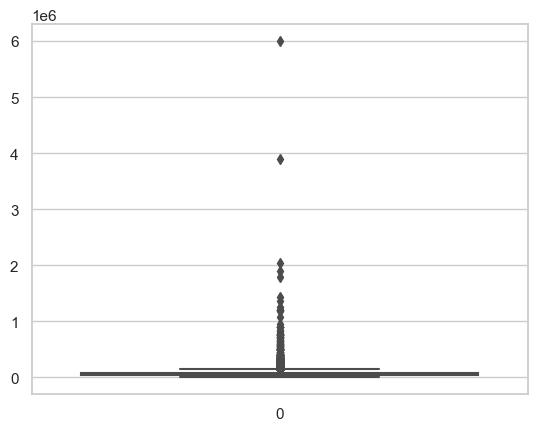

In [563]:
sns.boxplot(loan_df['annual_inc'])

In [564]:
loan_df.annual_inc.value_counts().sort_index(ascending=False)

annual_inc
6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: count, Length: 5215, dtype: int64

<Axes: >

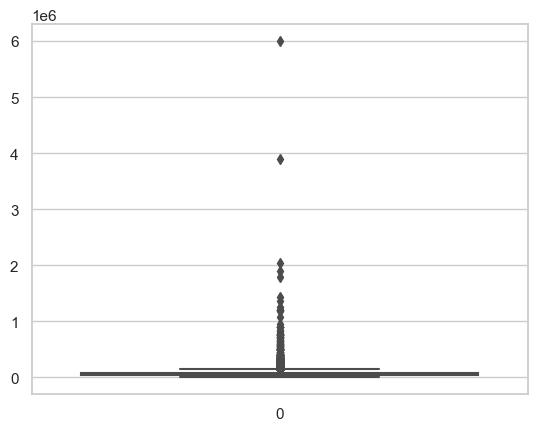

In [565]:
sns.boxplot(loan_df['annual_inc'])

In [566]:
# Annual income has outliers. Calculating the inter-quartile range (IQR) and filtering out the outliers outside
#of lower and upper bound

<Axes: >

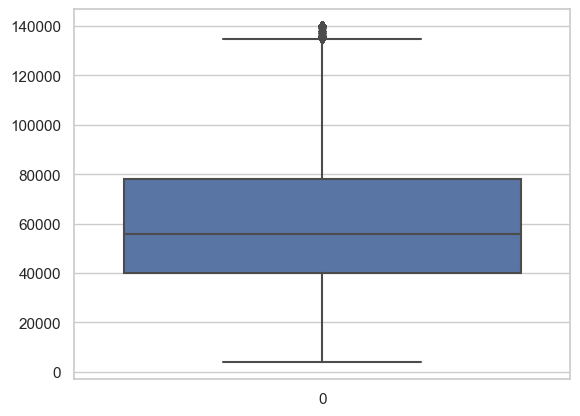

In [567]:
# using quantile
quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]


# Show boxplot
sns.boxplot(loan_df.annual_inc)

<Axes: >

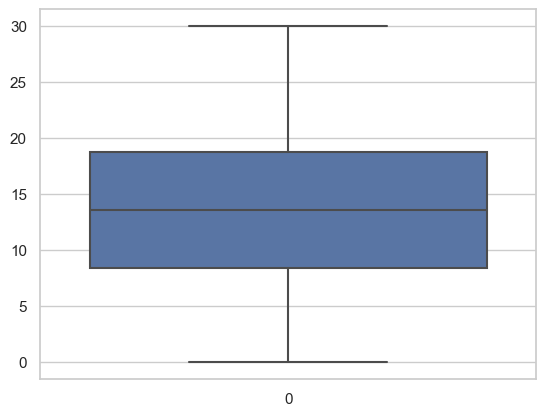

In [568]:
sns.boxplot(loan_df.dti)

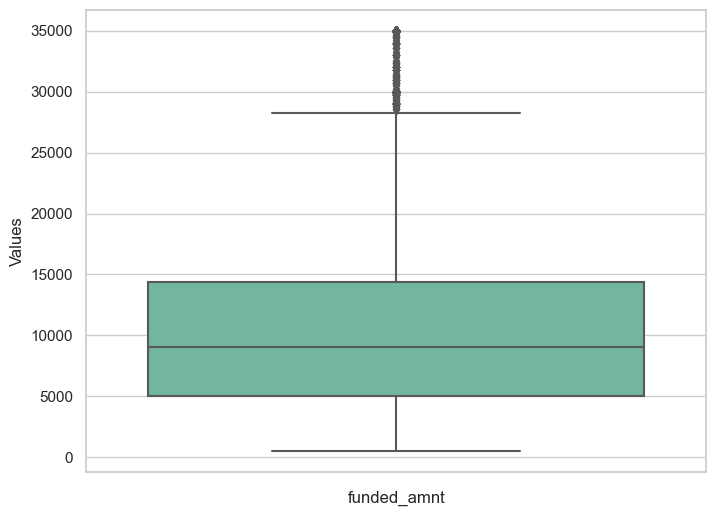

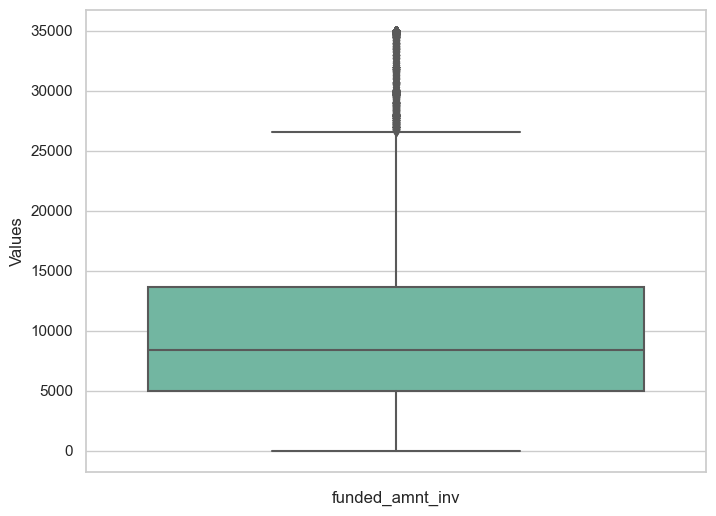

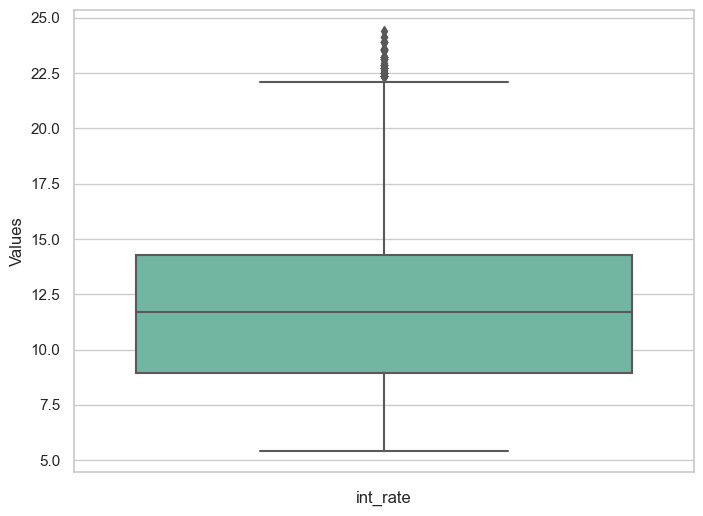

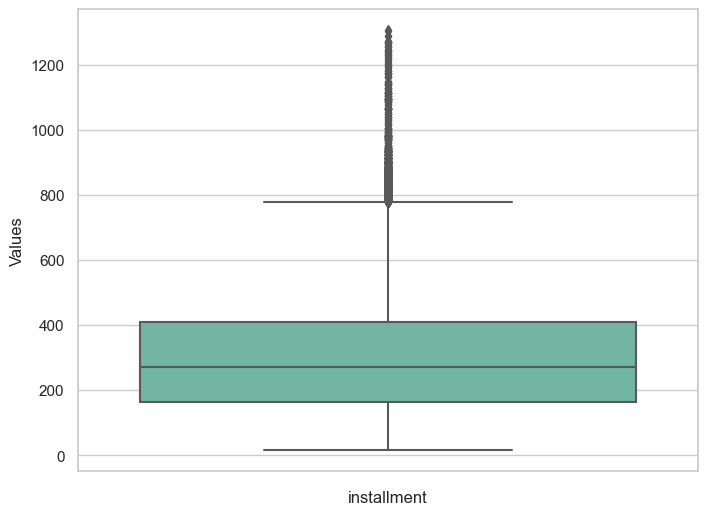

In [569]:
for col in ['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment']:
    create_boxplot(loan_df, col)

- The annual income of most of the loan applicants is between 40, 000 - 75, 000 USD
- The loan amount of most of the loan applicants is between 5, 000 - 15, 000 
- The funded amount of most of the loan applicants is between 5, 000 - 14, 000 USD
- The funded amount by investor for most of the loan applicants is between 5, 000 - 14, 000 USD
- The interest rate on the loan is between 9% - 14%
- The monthly installment amount on the loan is between 160 - 440
- The debt to income ration is between 8 - 18

### Imputing values in Columns

In [570]:
loan_df.emp_length.isna().sum()

1014

In [571]:
# Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].describe()

count      1014.000000
mean      42436.957160
std       23844.385465
min        4200.000000
25%       24468.000000
50%       37302.000000
75%       55470.000000
max      134000.000000
Name: annual_inc, dtype: float64

In [572]:
# Most frequent Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].mode()

0    36000.0
Name: annual_inc, dtype: float64

In [573]:
# Find the most frequent value of employment length
loan_df.emp_length.value_counts()

emp_length
10+ years    7888
< 1 year     4327
2 years      4101
3 years      3824
4 years      3200
5 years      3044
1 year       3043
6 years      2073
7 years      1644
8 years      1343
9 years      1153
Name: count, dtype: int64

In [574]:
loan_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [575]:
#Employment length has 1015 missing values, which means either they are not employed or self-employed (business owners). Considering they have a decent average annual income, we have assumed that these are business owners and we have added their employment duration with the mode value of emp_length which is 10+ years

In [576]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

In [577]:
# Verify if the imputation of values is successful
loan_df.emp_length.isna().sum()

0

###### Mapping employment length with the respective number of years in int

In [578]:
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)

In [579]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          93
NONE            3
Name: count, dtype: int64

###### Imputing NONE values as OTHER for home_ownership

In [580]:
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [581]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          96
Name: count, dtype: int64

In [582]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16280
Verified           11219
Source Verified     9155
Name: count, dtype: int64

In [583]:
###Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. 
##the loan applicant has some source of income which is verified

In [584]:
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [585]:
loan_df.verification_status.value_counts()

verification_status
Verified        20374
Not Verified    16280
Name: count, dtype: int64

In [586]:
# Verify if the dataset has no longer null values
loan_df.isna().sum()

addr_state                 0
annual_inc                 0
collection_recovery_fee    0
dti                        0
emp_length                 0
funded_amnt                0
funded_amnt_inv            0
grade                      0
home_ownership             0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
purpose                    0
sub_grade                  0
term                       0
verification_status        0
dtype: int64

#### Cleaned up loan dataset

In [587]:
loan_df

,addr_state,annual_inc,collection_recovery_fee,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,sub_grade,term,verification_status
0,AZ,24000.0,0.00,27.65,10,5000.0,4975.0,B,RENT,162.87,10.65,2011-12-01,5000.0,Fully Paid,credit_card,B2,36,Verified
1,GA,30000.0,1.11,1.00,0,2500.0,2500.0,C,RENT,59.83,15.27,2011-12-01,2500.0,Charged Off,car,C4,60,Verified
2,IL,12252.0,0.00,8.72,10,2400.0,2400.0,C,RENT,84.33,15.96,2011-12-01,2400.0,Fully Paid,small_business,C5,36,Not Verified
3,CA,49200.0,0.00,20.00,10,10000.0,10000.0,C,RENT,339.31,13.49,2011-12-01,10000.0,Fully Paid,other,C1,36,Verified
5,AZ,36000.0,0.00,11.20,3,5000.0,5000.0,A,RENT,156.46,7.90,2011-12-01,5000.0,Fully Paid,wedding,A4,36,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,0.00,15.55,5,5000.0,700.0,B,MORTGAGE,158.30,8.70,2007-07-01,5000.0,Fully Paid,credit_card,B1,36,Not Verified
39712,CO,110000.0,0.00,11.33,4,2500.0,1075.0,A,MORTGAGE,78.42,8.07,2007-07-01,2500.0,Fully Paid,home_improvement,A4,36,Not Verified
39713,NC,18000.0,0.00,6.40,3,8500.0,875.0,C,RENT,275.38,10.28,2007-07-01,8500.0,Fully Paid,credit_card,C1,36,Not Verified
39714,MA,100000.0,0.00,2.30,0,5000.0,1325.0,A,MORTGAGE,156.84,8.07,2007-07-01,5000.0,Fully Paid,debt_consolidation,A4,36,Not Verified


In [588]:
# Derived columns

In [589]:
# Extracting Month and Year for analysis from issue_d
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [590]:
# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

In [591]:
loan_df[['issue_d', 'issue_m', 'issue_q']]

,issue_d,issue_m,issue_q
0,2011-12-01,12,Q4
1,2011-12-01,12,Q4
2,2011-12-01,12,Q4
3,2011-12-01,12,Q4
5,2011-12-01,12,Q4
...,...,...,...
39711,2007-07-01,7,Q3
39712,2007-07-01,7,Q3
39713,2007-07-01,7,Q3
39714,2007-07-01,7,Q3


In [592]:
#Create new column loan_paid with 'Yes' and 'No' values 
#based on loan_status column where 
#'Yes' = "Fully Paid" and 'No' = "Charged off"

In [593]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
loan_df['loan_paid'] = loan_df['loan_status'].map(loan_status_map)

In [594]:
#Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket), funded amount bucket (funded_amnt_bucket), Debt to Income Bucket (dti_bucket)

In [595]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [596]:
loan_df[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39711,5000.0,5K - 10K
39712,2500.0,0 - 5K
39713,8500.0,5K - 10K
39714,5000.0,5K - 10K


In [597]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [598]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [599]:
# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_df['funded_amnt_bucket'] = loan_df['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

In [600]:
loan_df[['funded_amnt', 'funded_amnt_bucket']]

,funded_amnt,funded_amnt_bucket
0,5000.0,5k - 10k
1,2500.0,0 - 5k
2,2400.0,0 - 5k
3,10000.0,10k - 15k
5,5000.0,5k - 10k
...,...,...
39711,5000.0,5k - 10k
39712,2500.0,0 - 5k
39713,8500.0,5k - 10k
39714,5000.0,5k - 10k


In [601]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_df['dti_bucket'] = loan_df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

### Univariate Analysis

In [602]:

#1. Categorical variables
#   A. Ordered categorical data     
#   B. Unordered categorical data
            
#2. Quantitative variables
   

#### 1 A) Ordered Categorical Variables

In [603]:

#         1. Grade 
#         2. Sub grade 
#         3. Term 
#         4. Employment length 
#         5. Issue year 
#         6. Issue month 
#         7. Issue quarter 

<Axes: xlabel='grade', ylabel='count'>

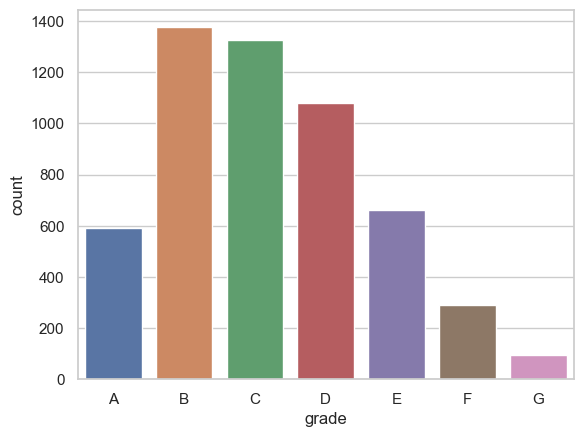

In [604]:
#1) grade
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='sub_grade', ylabel='count'>

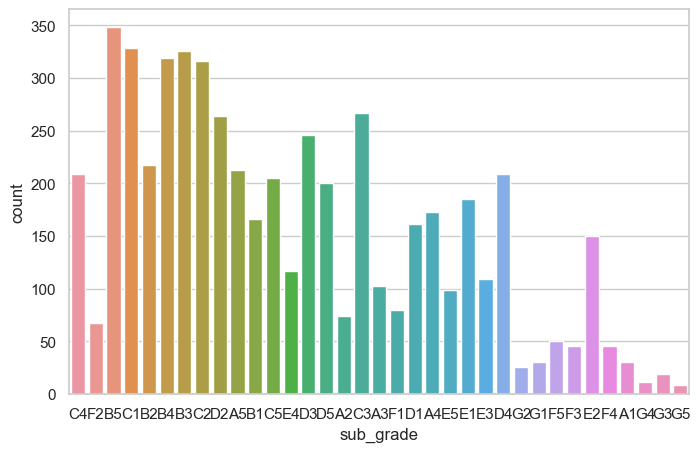

In [605]:
#2) Sub grade
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='sub_grade', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [606]:
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

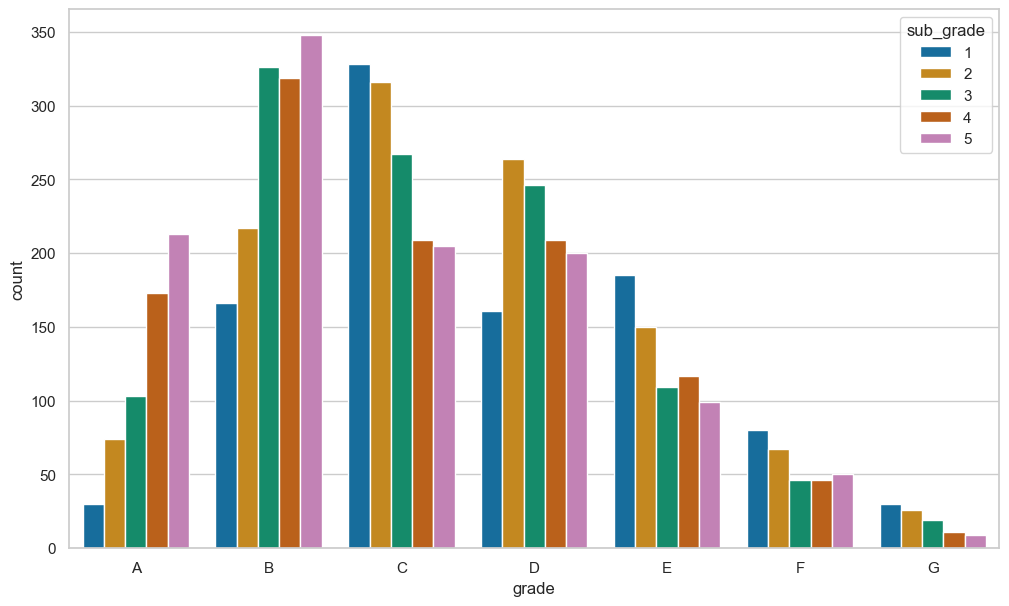

In [607]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

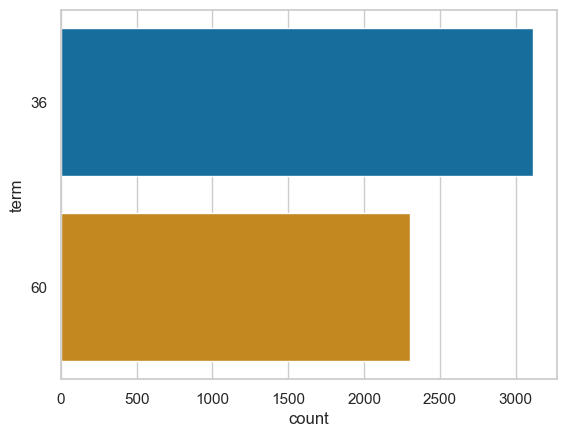

In [608]:
#3) Term 
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

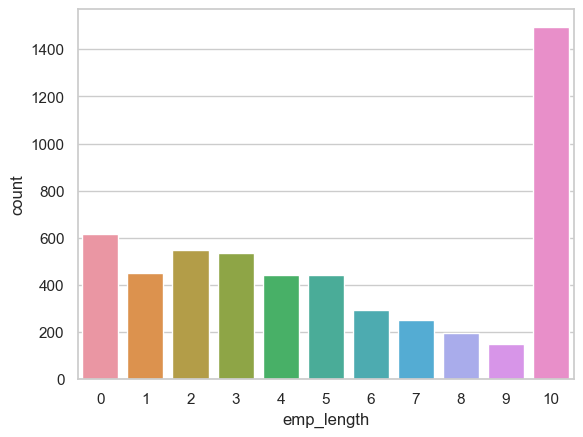

In [609]:
# 4. Employment length (emp_length)
sns.countplot(x='emp_length', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_y', ylabel='count'>

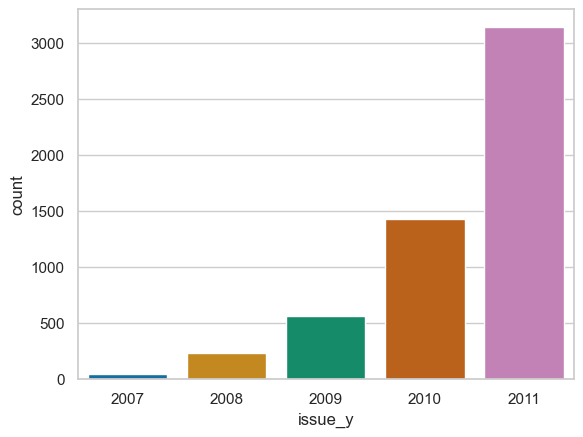

In [610]:
#5) Issue year
sns.countplot(x='issue_y', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_m', ylabel='count'>

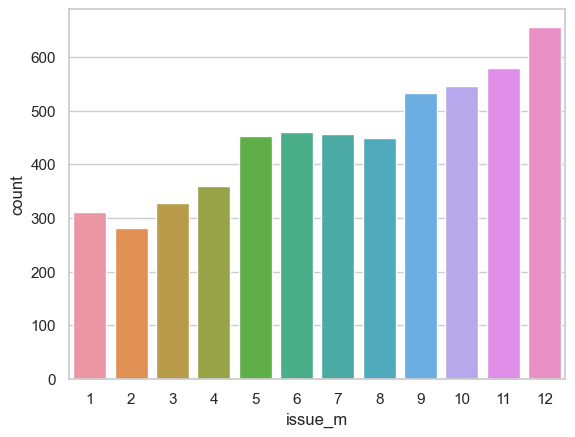

In [611]:
# 6) Issue month
sns.countplot(x='issue_m', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_q', ylabel='count'>

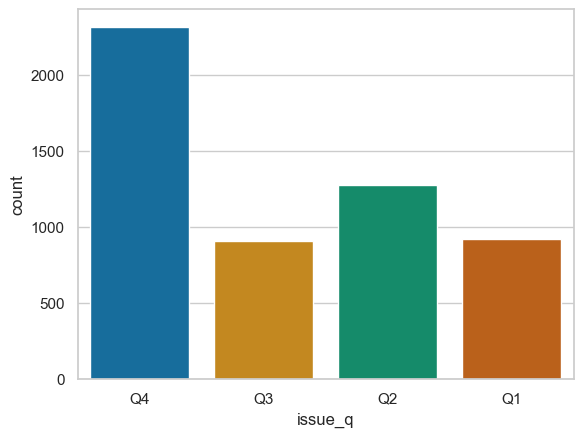

In [612]:
# 7) Issue quarter
sns.countplot(x='issue_q', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### 2. Unordered Categorical Variables

In [613]:
#1. Home Ownership 
#2. Loan purpose 
#3. Loan status 
#4. Address State 
#5. Loan paid 

In [614]:
#1) Home Ownership

#checking unique values for home_ownership again
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

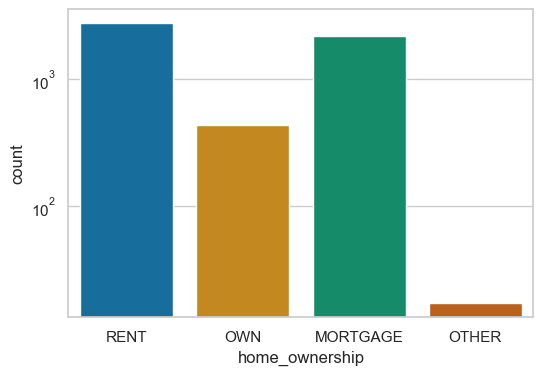

In [615]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

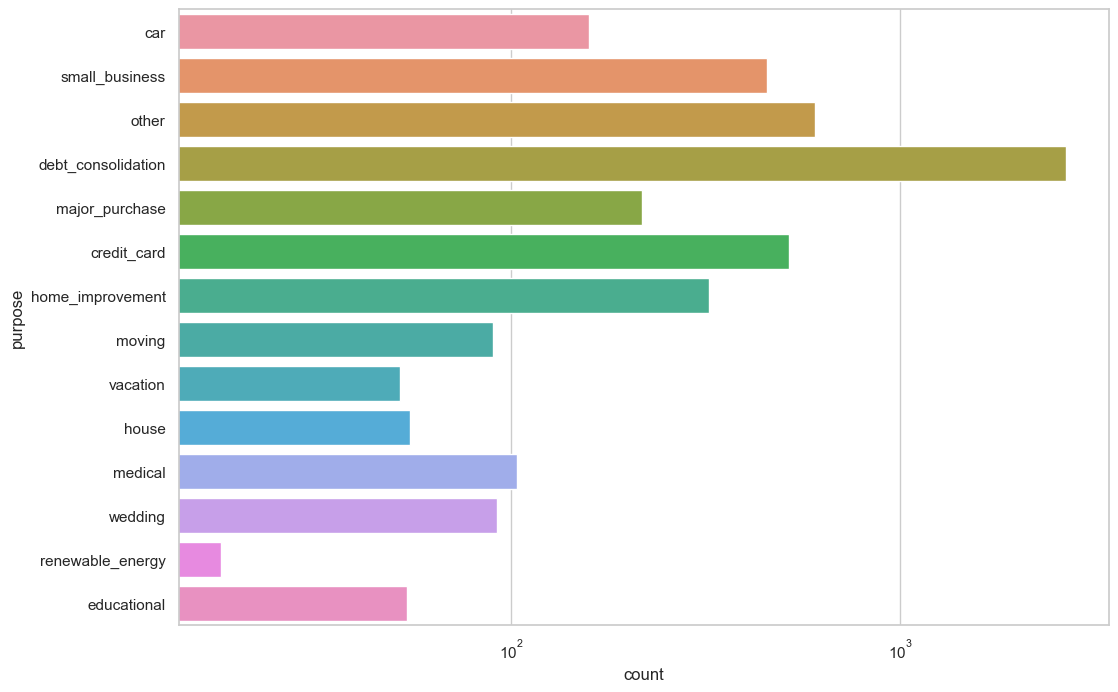

In [616]:
#2) purpose

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])


<Axes: xlabel='loan_status', ylabel='count'>

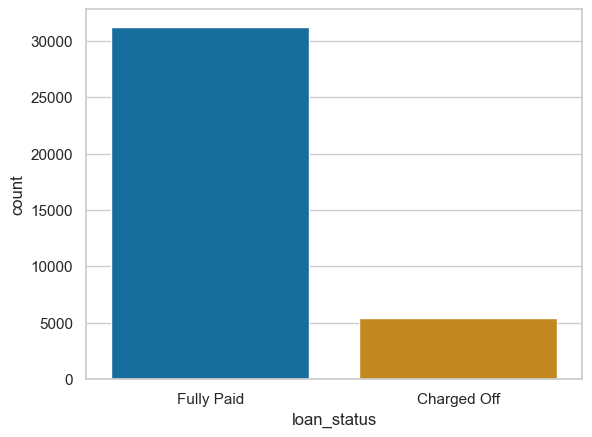

In [617]:
# 3) Loan status
sns.countplot(x = 'loan_status', data = loan_df)



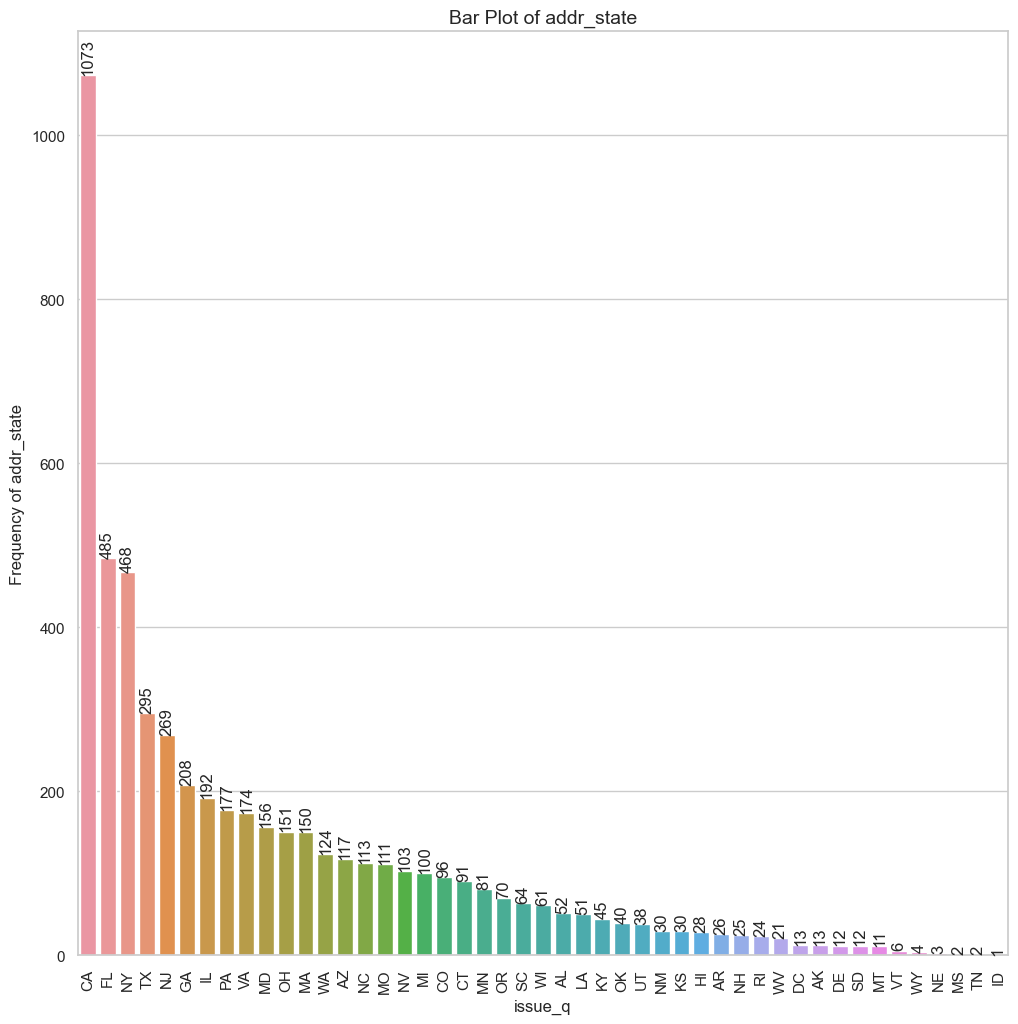

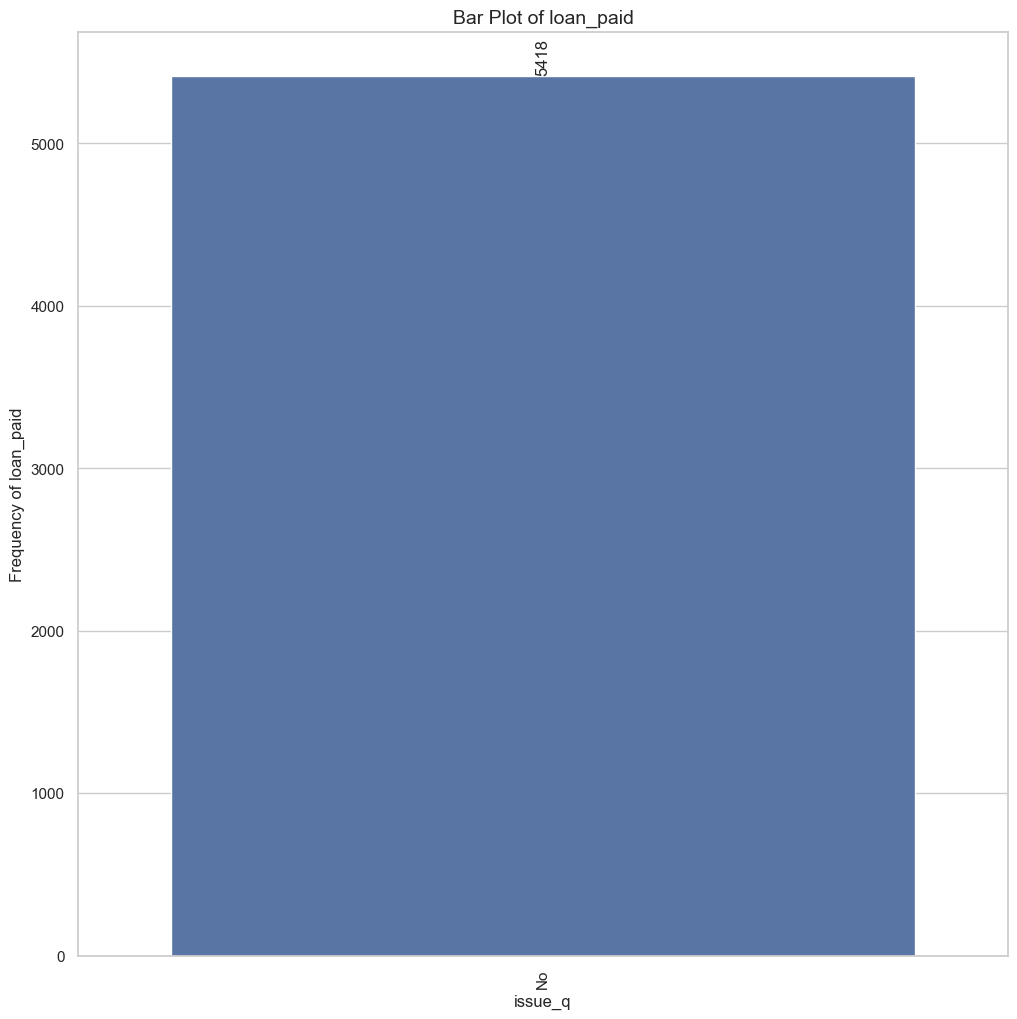

In [618]:
# 4) adddess State (addr_state)
# 5) Loan paid (loan_paid)

for un_cat_var in ['addr_state', 'loan_paid']:
    plot_bar_graph(
        loan_df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

#### 2. Quantitative variables

<Axes: xlabel='int_rate_bucket', ylabel='count'>

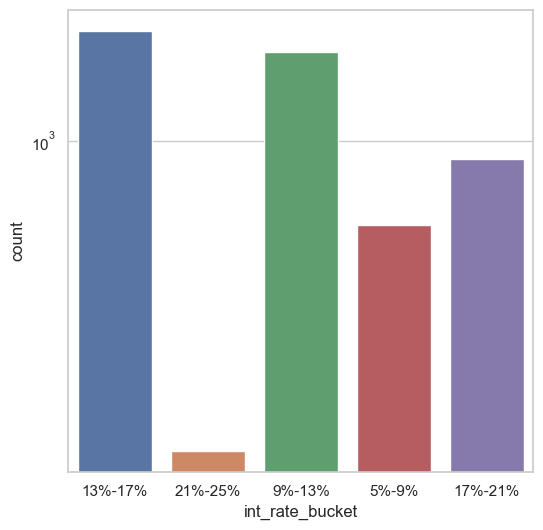

In [619]:
# 1) Interesr rate bucket

fig,ax = plt.subplots(figsize = (6,6))
ax.set_yscale('log')
sns.countplot(x='int_rate_bucket',data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_bucket', ylabel='count'>

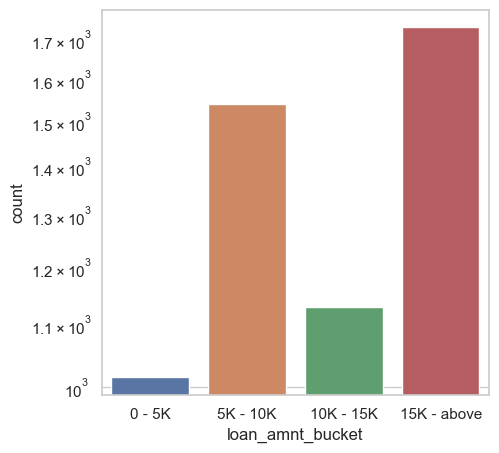

In [620]:
# 2) Loan Amount bucket
fig,ax = plt.subplots(figsize = (5,5))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_bucket', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='funded_amnt_bucket', ylabel='count'>

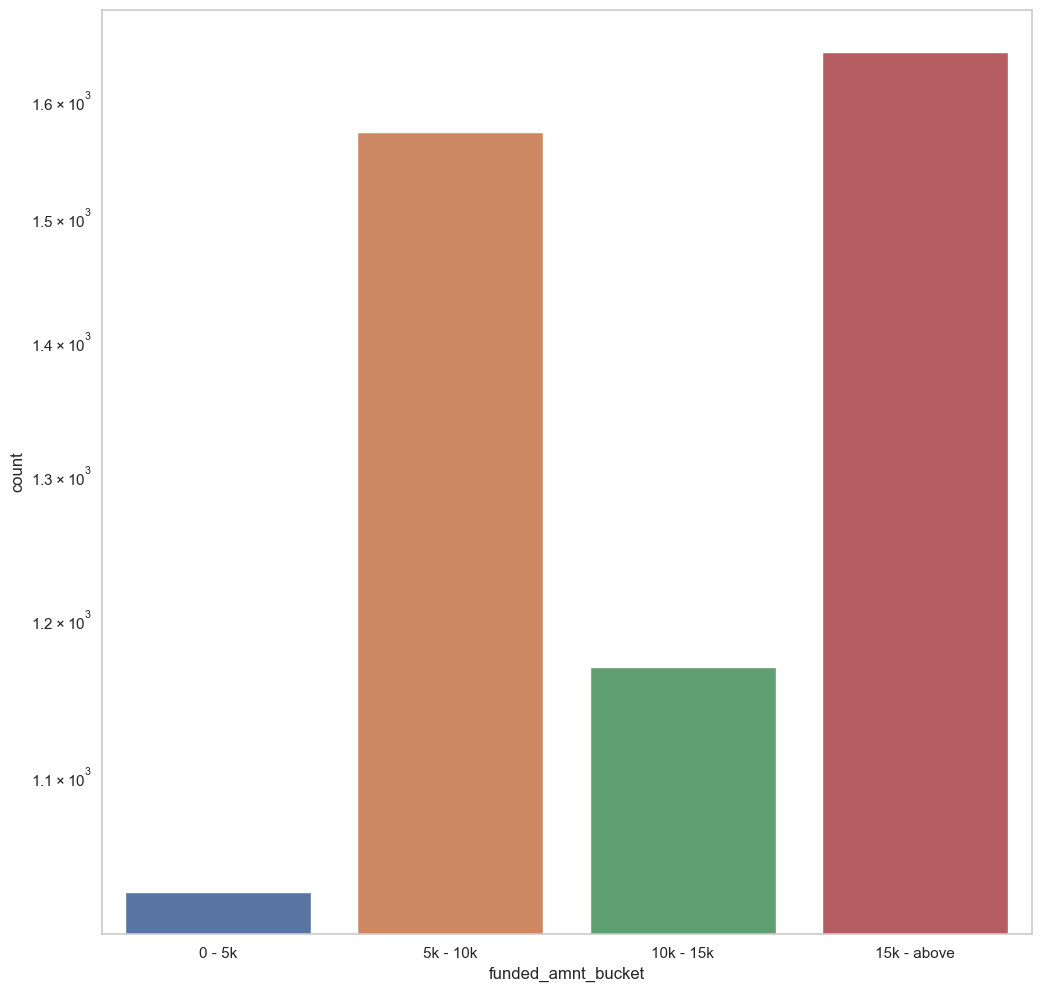

In [621]:
# 3) Funded Amount bucket
fig,ax = plt.subplots(figsize = (12,12))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_bucket', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_bucket', ylabel='count'>

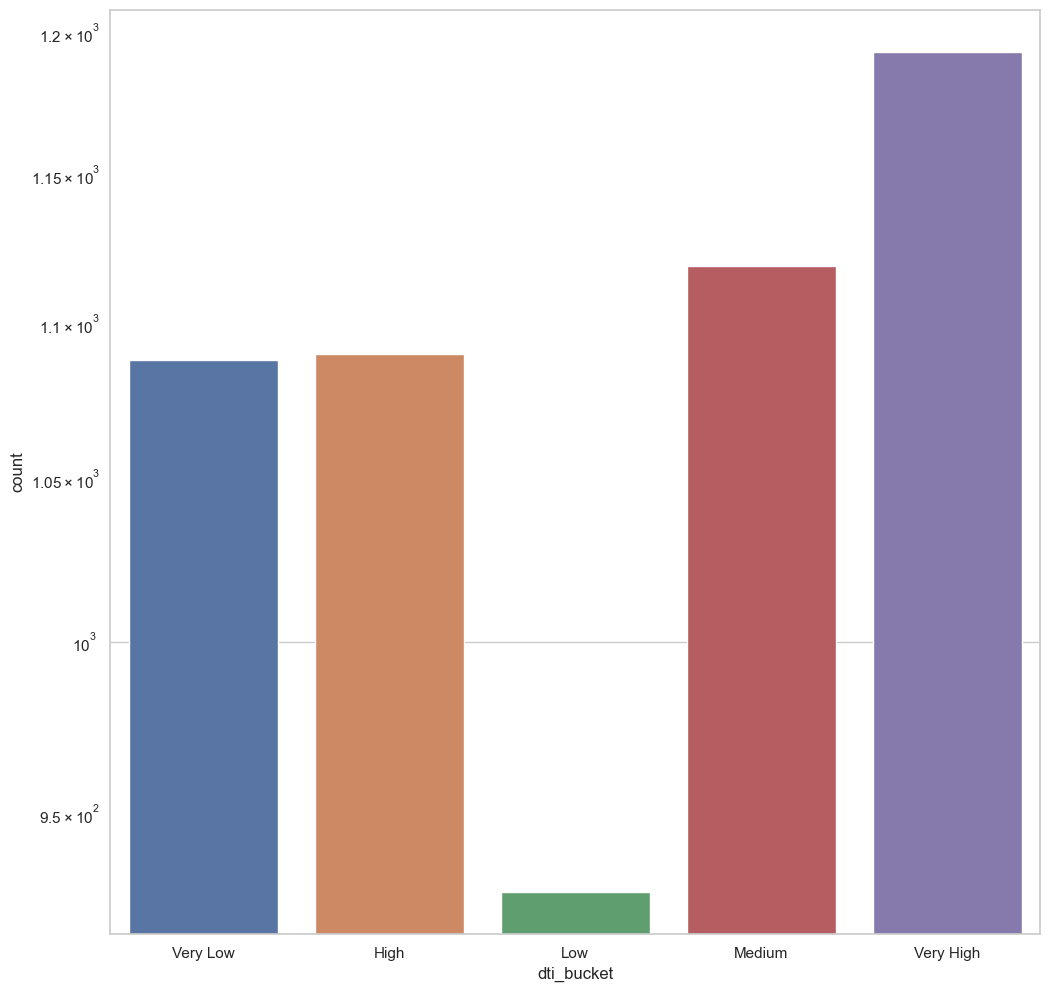

In [622]:
# 4) Dti bucket

fig,ax = plt.subplots(figsize = (12,12))
ax.set_yscale('log')
sns.countplot(x='dti_bucket', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [623]:
installments_df = loan_df[loan_df.loan_paid == 'No']

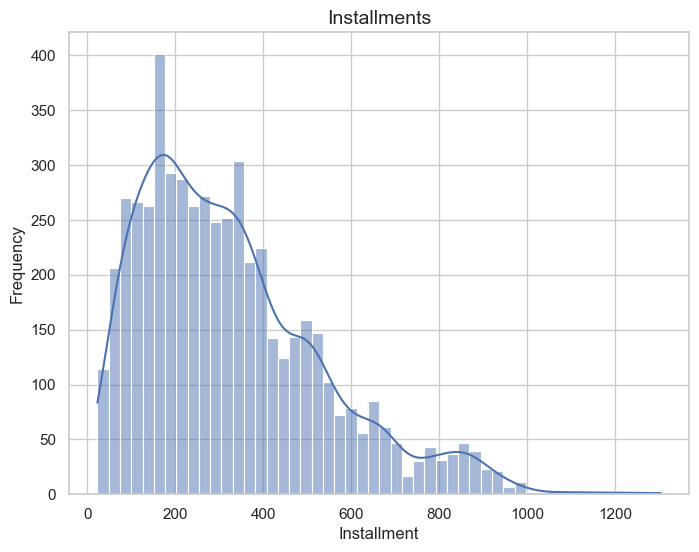

In [624]:
#5) Installment

plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')

# Observations- Univariant Analysis

The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 
### Ordered Categorical Variables

- Grade B had the highest number of "Charged off" loan applicants.
- Short-term loans with a duration of 36 months were the most popular among "Charged off" applicants

- Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans.

- The year 2011 recorded the highest number of "Charged off" loan applications

- "Charged off" loans were predominantly taken during the 4th quarter primarily in December. 


### Unordered Categorical Variables

- The majority of "Charged off" loan participants who lived in rented houses. 

- A significant number of loan participants were loan defaulters, unable to clear their loans. The lending company should enhance risk assessment practices, including stricter credit checks and lower loan-to-value ratios, for applicants with a history of loan defaults. They should offer financial education and support services to help borrowers manage their finances and improve loan repayment outcomes.

- California had the highest number of "Charged off" loan applicants, 

- Debt consolidation was the primary loan purpose for most "Charged off" loan applicants, with 2,633 applicants selecting this option. The lending company needs to exercise caution when approving loans for debt consolidation purposes, as it was the primary loan purpose for many "Charged off" applicants.
 


### Quantitative variables

- 1,561 loan applicants who charged off had annual salaries less than 40,000 USD. 
- Loan participants who charged off belonged to the interest rate bucket of 13%-17%.
- Loan participants who charged off received loan amounts of 15,000 USD and above.
- 1,608 loan participants who charged off received funded amounts of 15,000 USD and above.
- Among loan participants who charged off, loan applicants had very high debt-to-income ratios. 
- Among loan participants who charged off, it's observed that the majority of them had monthly installment amounts falling within the range of 160-440 USD. 

### 2. Bivariate Analysis


In [625]:

#1. Categorical variables
#    A. Ordered categorical data     
#    B. Unordered categorical data
            
#2. Quantitative variables

### 2 A) Bivariate Analysis of Ordered Categorical Variables

In [626]:
#### 1) Grade vs. Loan Status

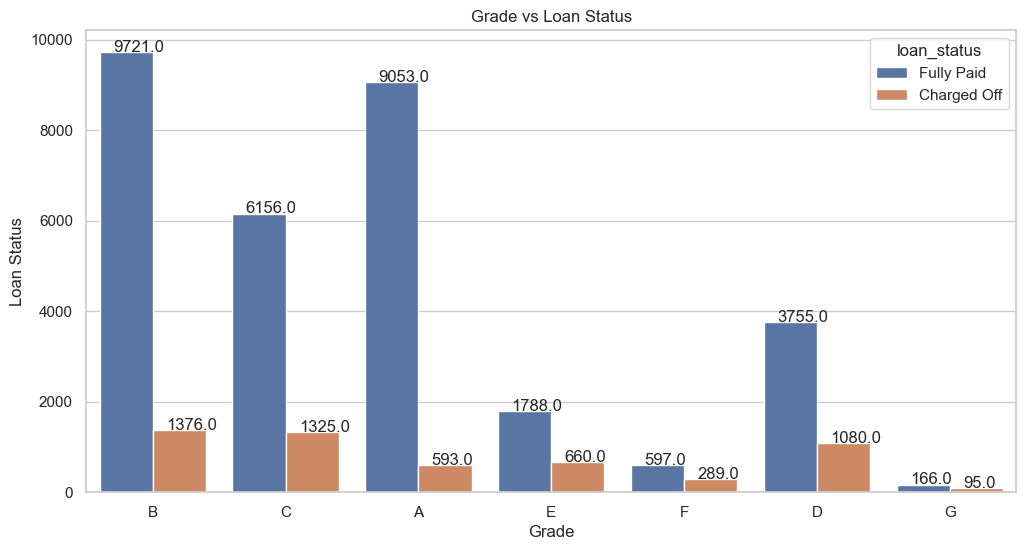

In [627]:
countplot_graph({
    'data': loan_df,
    'x': 'grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
})

###### The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans

In [628]:
####  Sub Grade vs. Loan Status

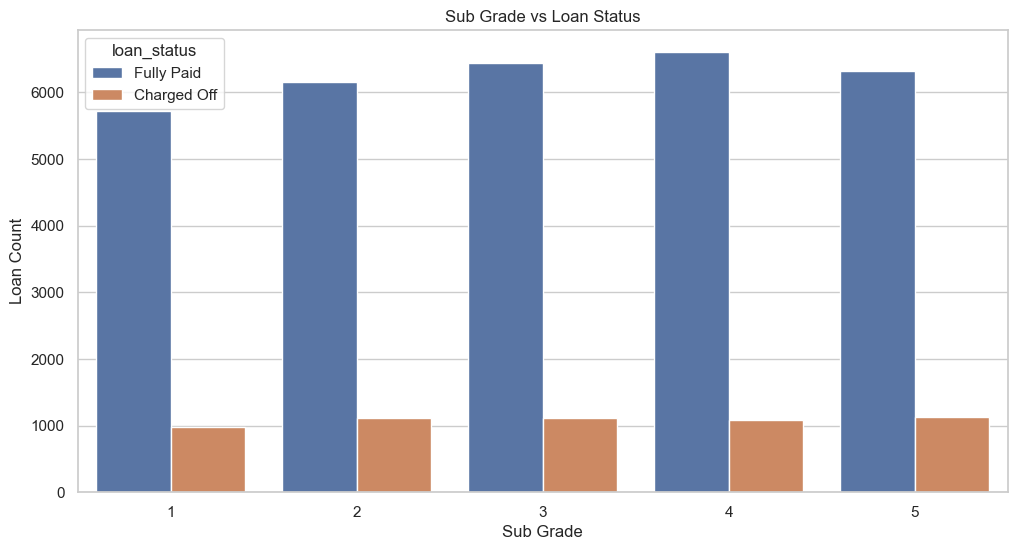

In [629]:
countplot_graph({
    'data': loan_df,
    'x': 'sub_grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Sub Grade',
    'ylabel': 'Loan Count',
    'title': 'Sub Grade vs Loan Status'
}, annot = False)

###### Loan applicants belonging to Sub Grades B3, B4, and B5 are likely to Charge off

In [630]:
####  Term vs. Loan Status

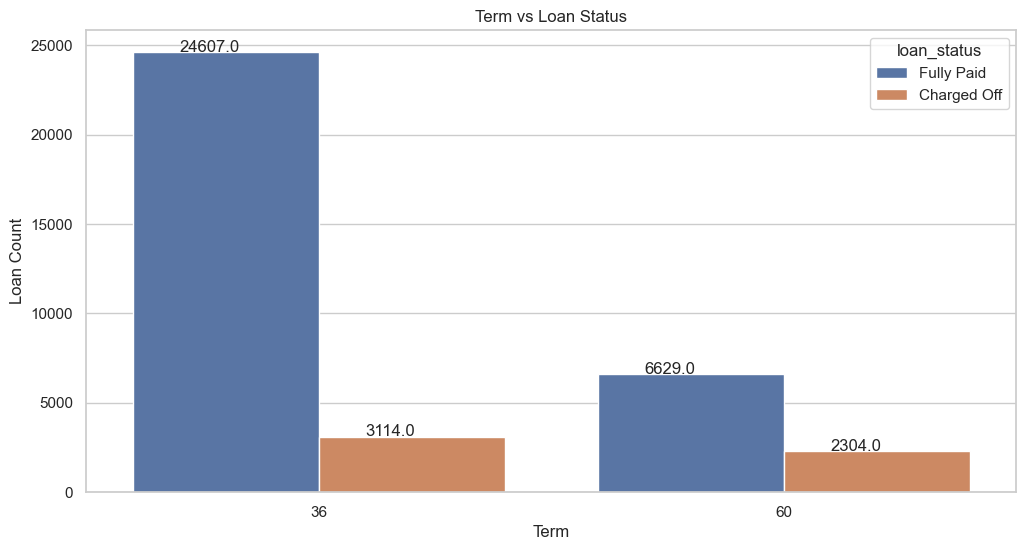

In [631]:
countplot_graph({
    'data': loan_df,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Term',
    'ylabel': 'Loan Count',
    'title': 'Term vs Loan Status',
    
})

In [632]:
charged_off_percent_36_m = charged_off_percent(loan_df, 'term', 36)
charged_off_percent_60_m = charged_off_percent(loan_df, 'term', 60)
print(f'Charged off pecentage for people taking loan for 60 months - {charged_off_percent_60_m}%')
print(f'Charged off pecentage for people taking loan for 36 months - {charged_off_percent_36_m}%')

Charged off pecentage for people taking loan for 60 months - 25.79%
Charged off pecentage for people taking loan for 36 months - 11.23%




##### Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months

In [633]:
#### Employment Length vs. Loan Status

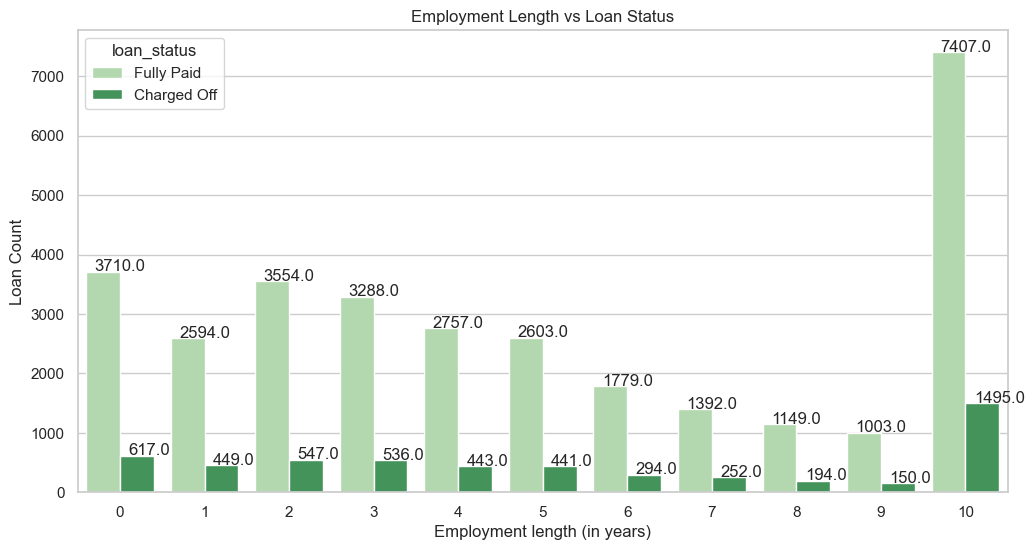

In [634]:
countplot_graph({
    'data': loan_df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "Greens"
})

###### Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default

In [635]:
#### Loan Year vs. Loan Status

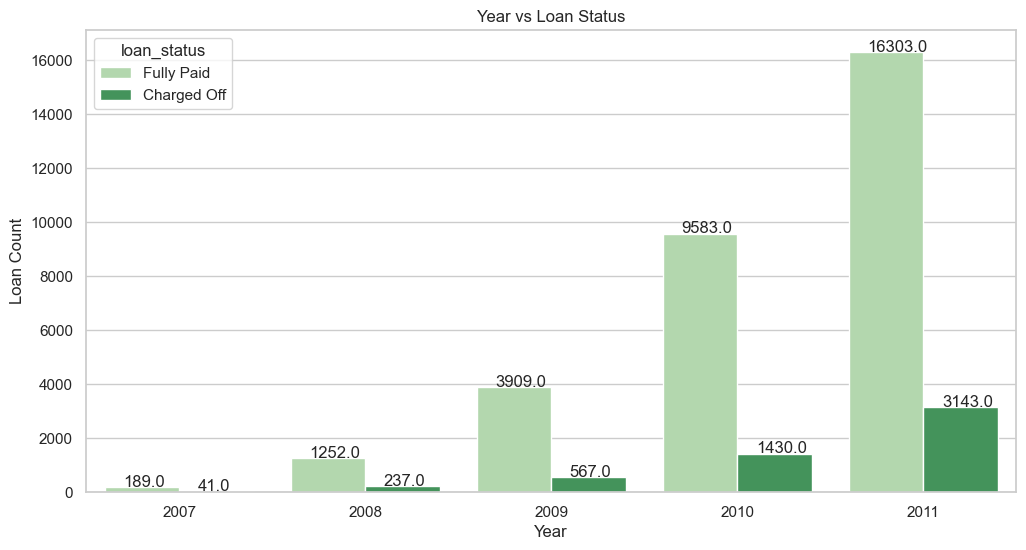

In [636]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_y',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Year',
    'ylabel': 'Loan Count',
    'title': 'Year vs Loan Status',
    'palette': "Greens"
})

###### The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.

### 2 B) Bivariate Analysis of Unordered Categorical Variables

In [637]:
#### Purpose vs. Loan Status

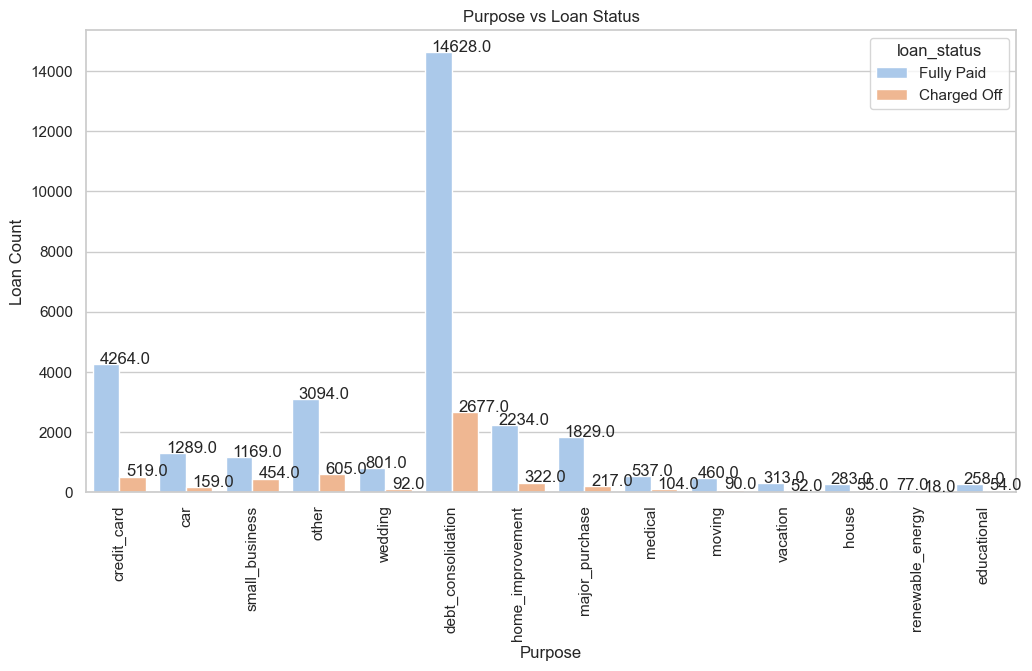

In [638]:
countplot_graph({
    'data': loan_df,
    'x': 'purpose',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Purpose',
    'ylabel': 'Loan Count',
    'title': 'Purpose vs Loan Status',
    'palette': "pastel",
    'x_tick_rotation': 90
})

###### Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category.

In [639]:
#### Home Ownership vs. Loan Status

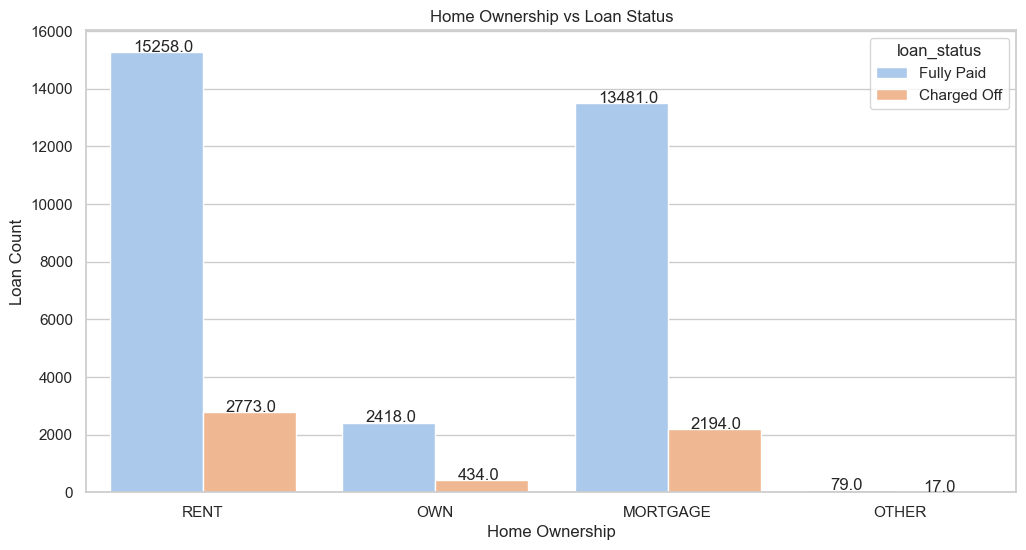

In [640]:
countplot_graph({
    'data': loan_df,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "pastel"
})

###### The loan applicants who live in a rented or mortgaged house are more likely to default

In [641]:
####  Verification Status vs. Loan Status

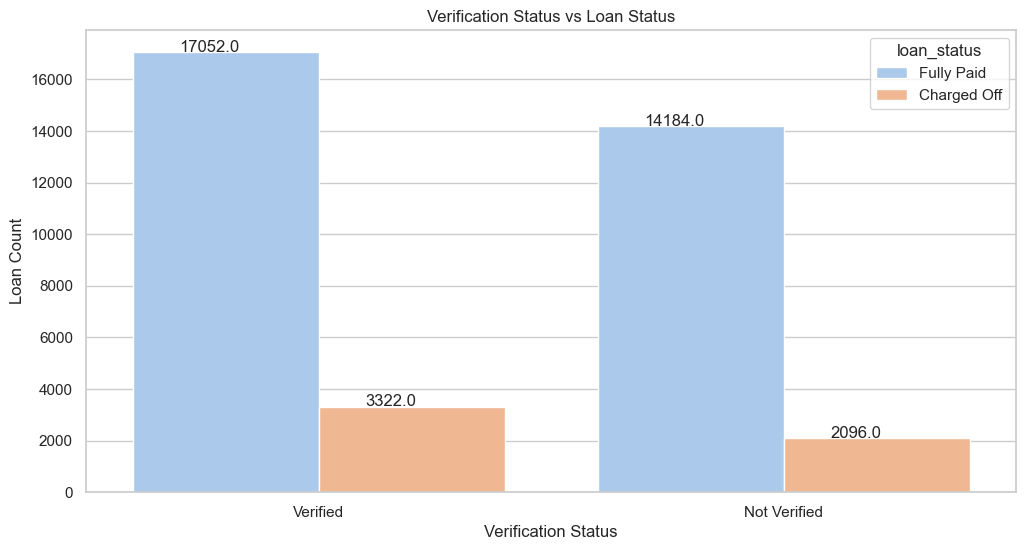

In [642]:
countplot_graph({
    'data': loan_df,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "pastel"
})

###### The loan applicants who have been verified are defaulting more than the applicants who are not verified

In [643]:
#### Address State vs. Loan Status

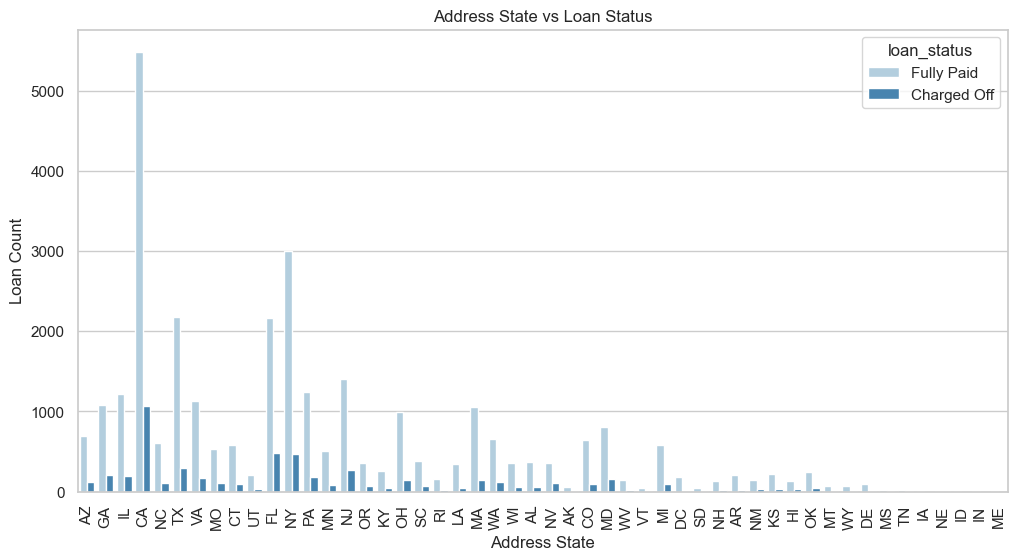

In [644]:
countplot_graph({
    'data': loan_df,
    'x': 'addr_state',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Address State',
    'ylabel': 'Loan Count',
    'title': 'Address State vs Loan Status',
    'palette': "Blues",
    'x_tick_rotation': 90
}, annot=False)

###### Loan applicants from the state of California (CA), Florida (FL), and New York (NY) are most likely to default

### Bivariate Analysis of Quantitative Variables

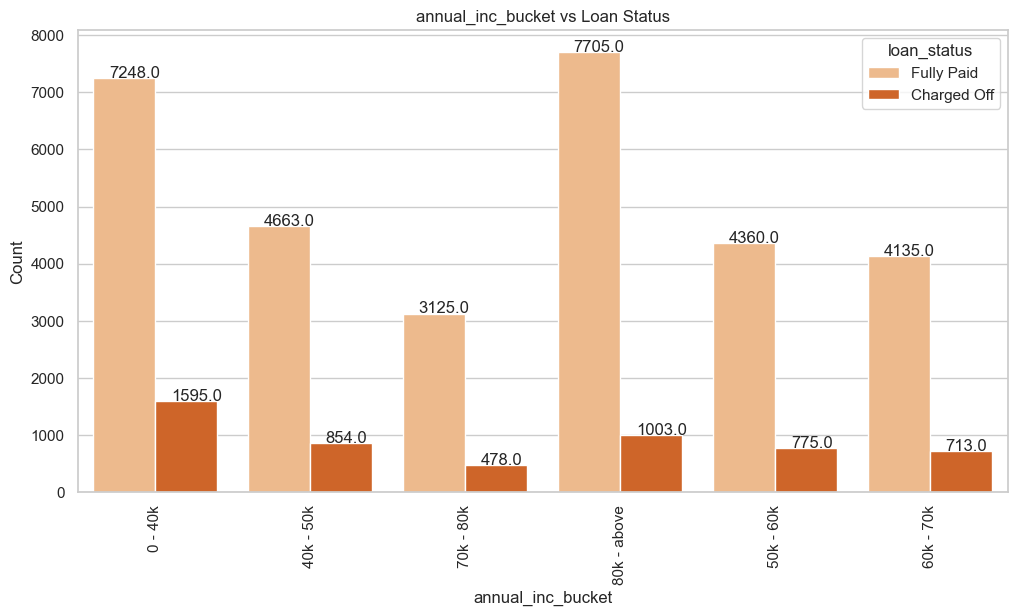

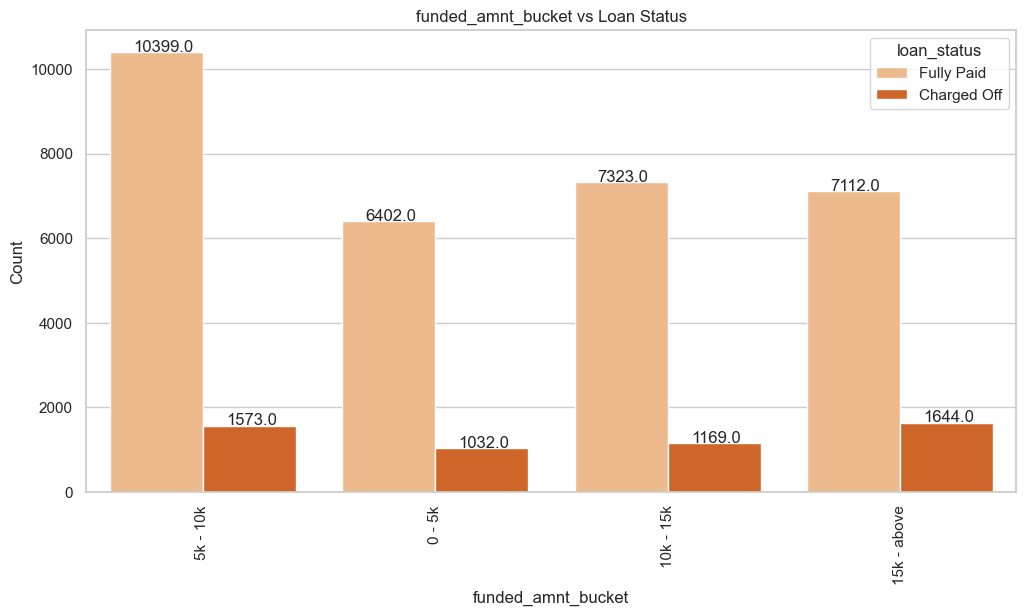

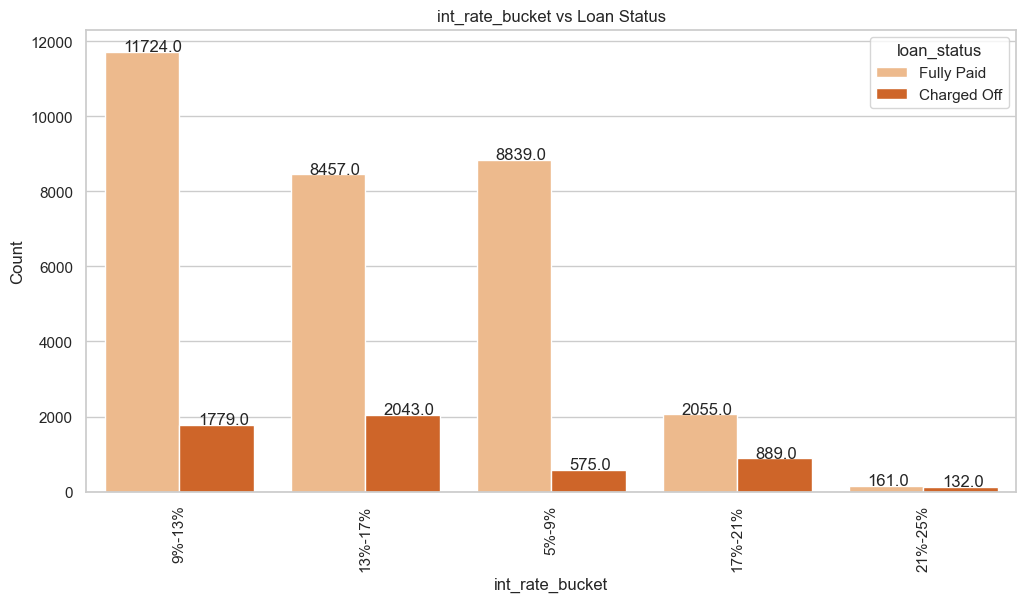

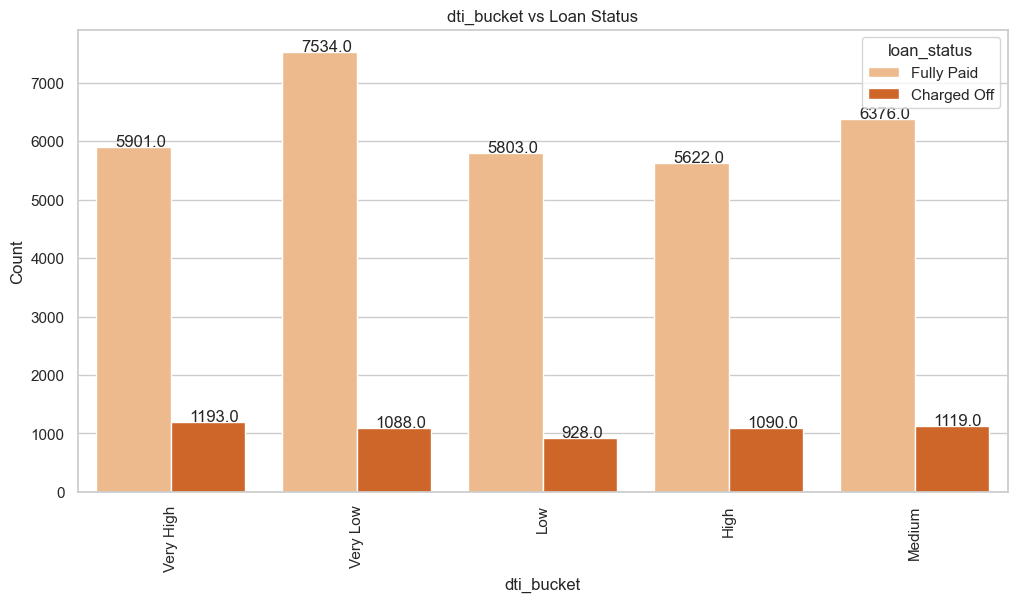

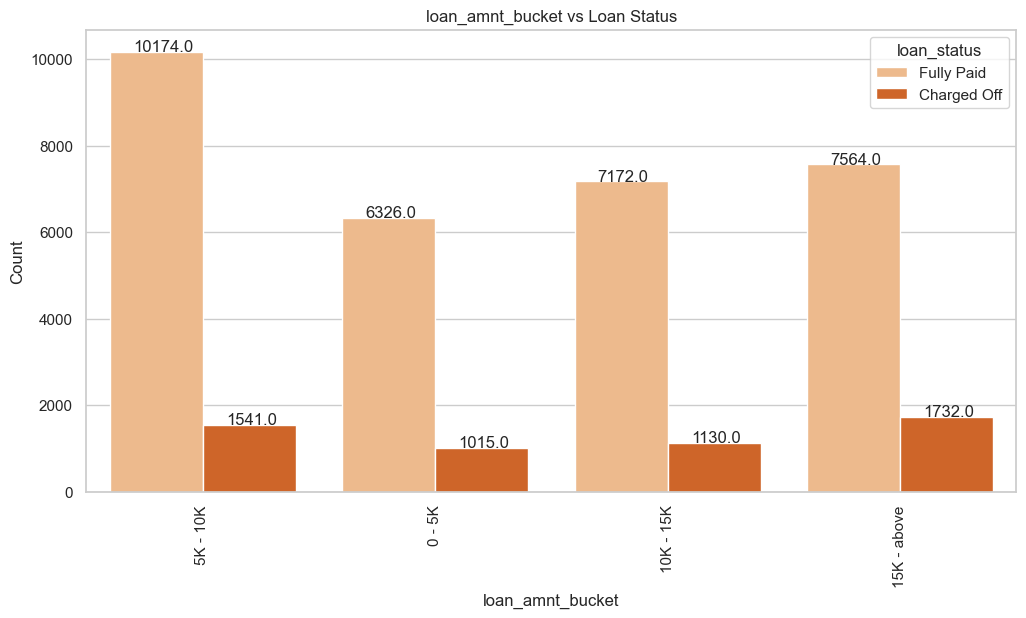

In [645]:
for col in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': loan_df,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': "Oranges",
    'x_tick_rotation': 90
}, annot=True)

# Observations- Bivariate Analysis

1. Grades B, C, and D contribute to most of the "Charged Off" loans.

2. Loan applicants belonging to Sub Grades B3, B4, and B5 are more likely to charge off.

3. 60-month term are more likely to default than those taking loans for 36 months.

4. Loan applicants have ten or more years of experience most likely to default.

5. Loan applicants charged off highest in 2011.

6. December is the most preferred month for taking loans.

7. Debt consolidation is the category where the maximum number of loans are issued, and people have defaulted the most in the same category.

8. Loan applicants who live in rented or mortgaged houses are more likely to default.

9. Verified loan applicants are defaulting more than those who are not verified.

10. Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.

11. A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

12. The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

13. A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%.

14. A majority of the loan applicants who charged off reported an annual income of less than $40,000.

## 4. Multivariate Analysis

###### Multivariate analysis is done for below columns against loan status and the charged off percentage

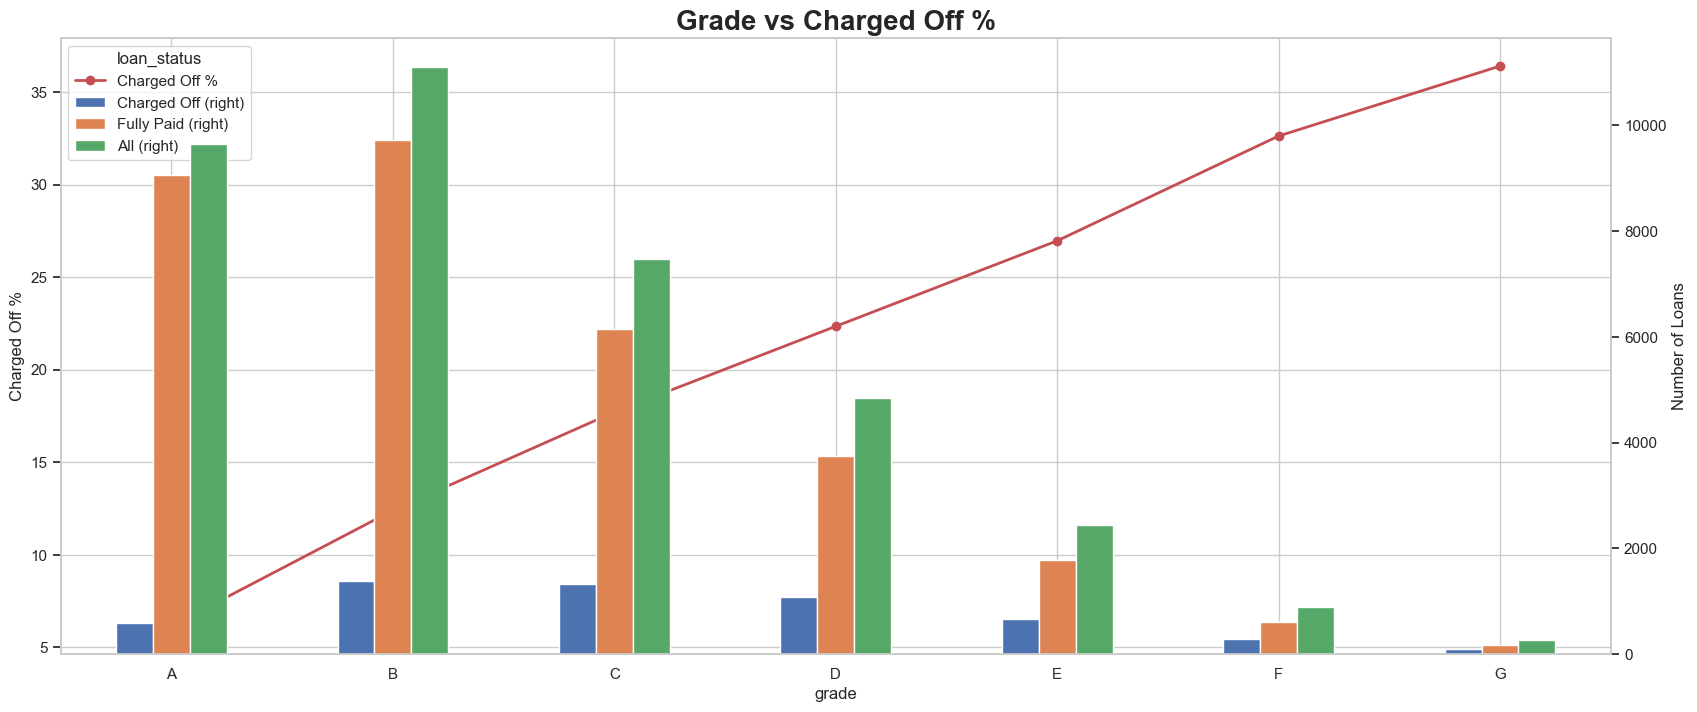

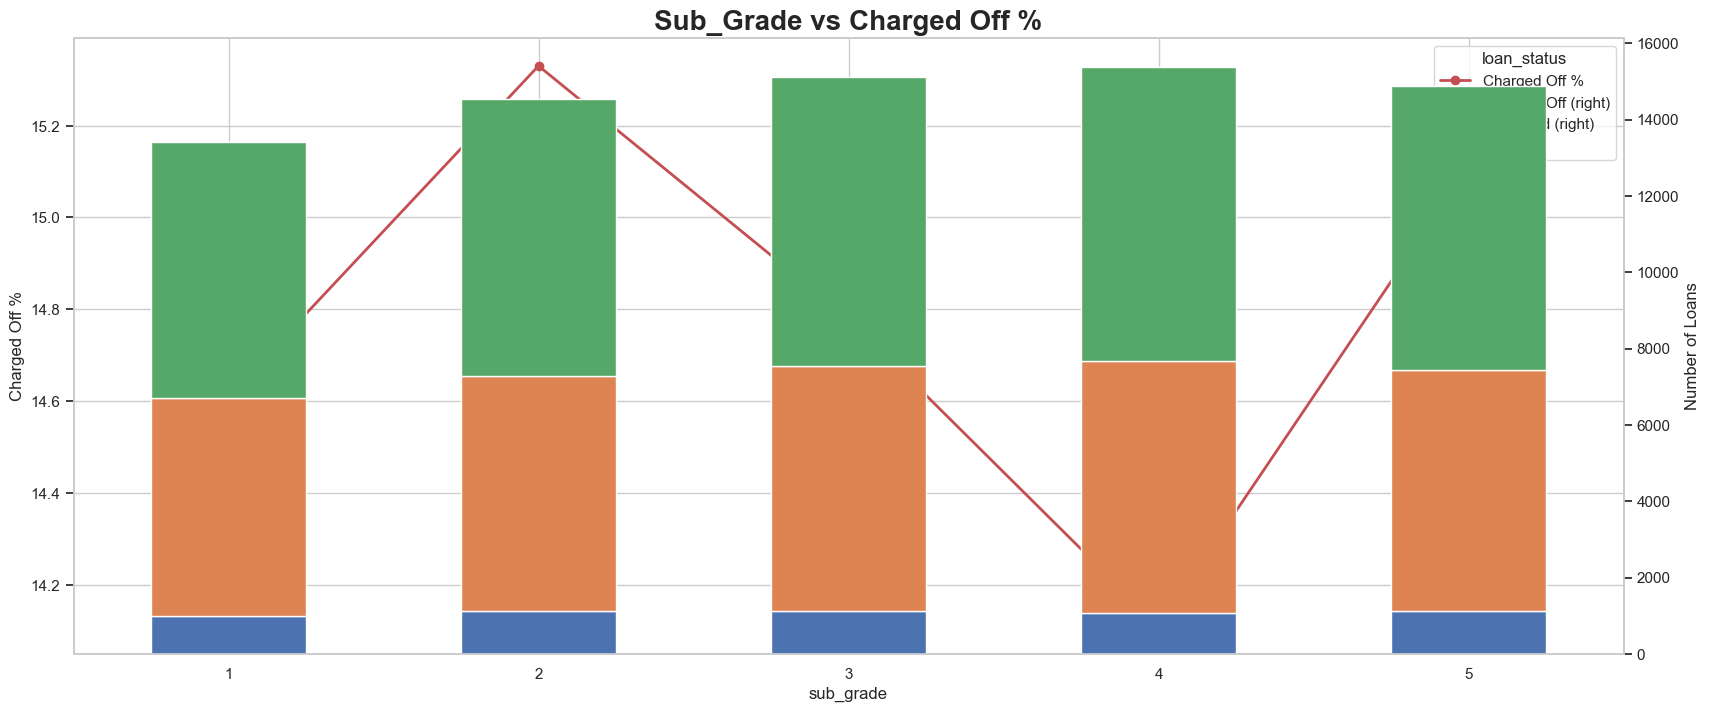

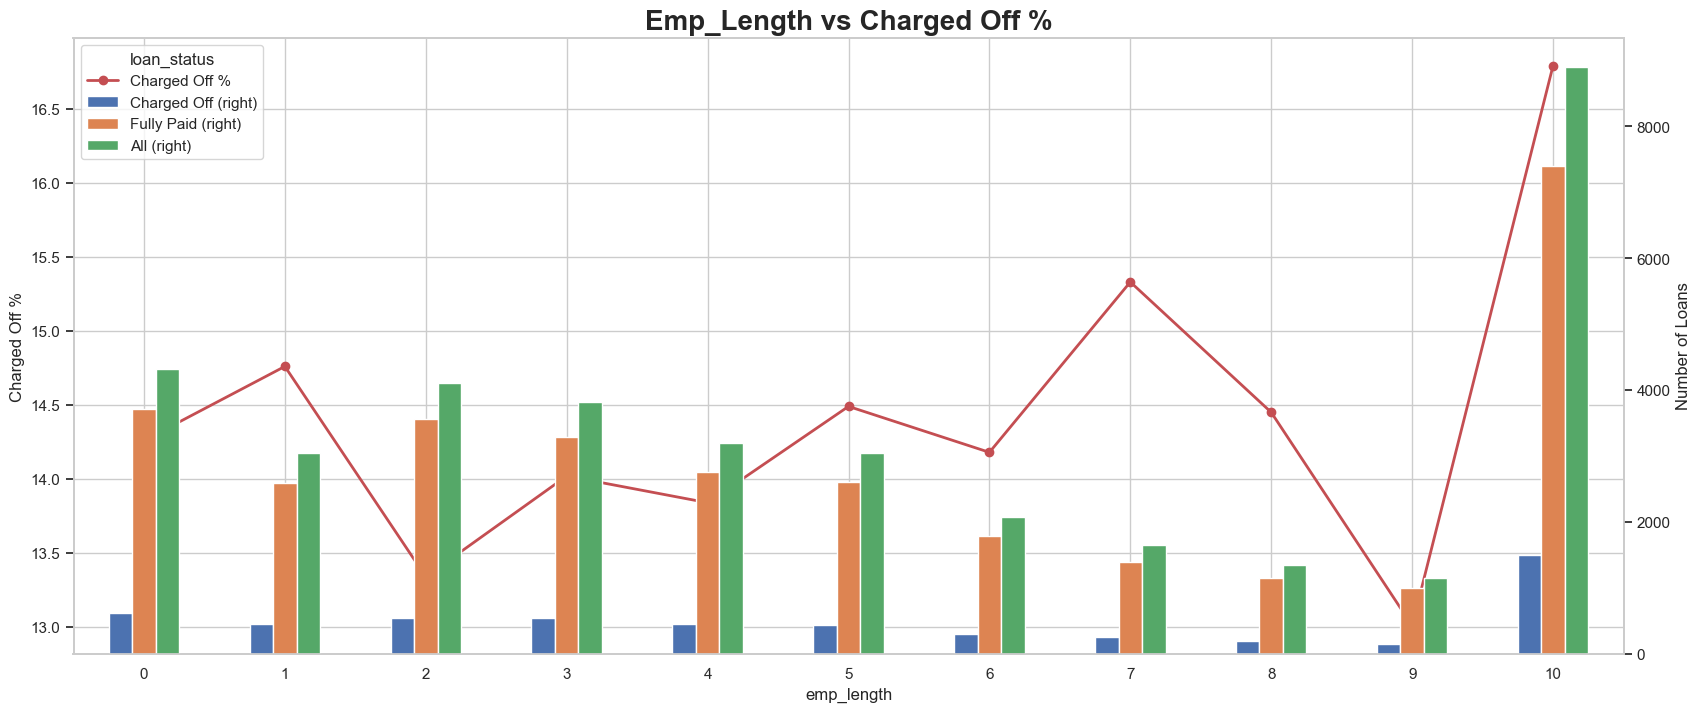

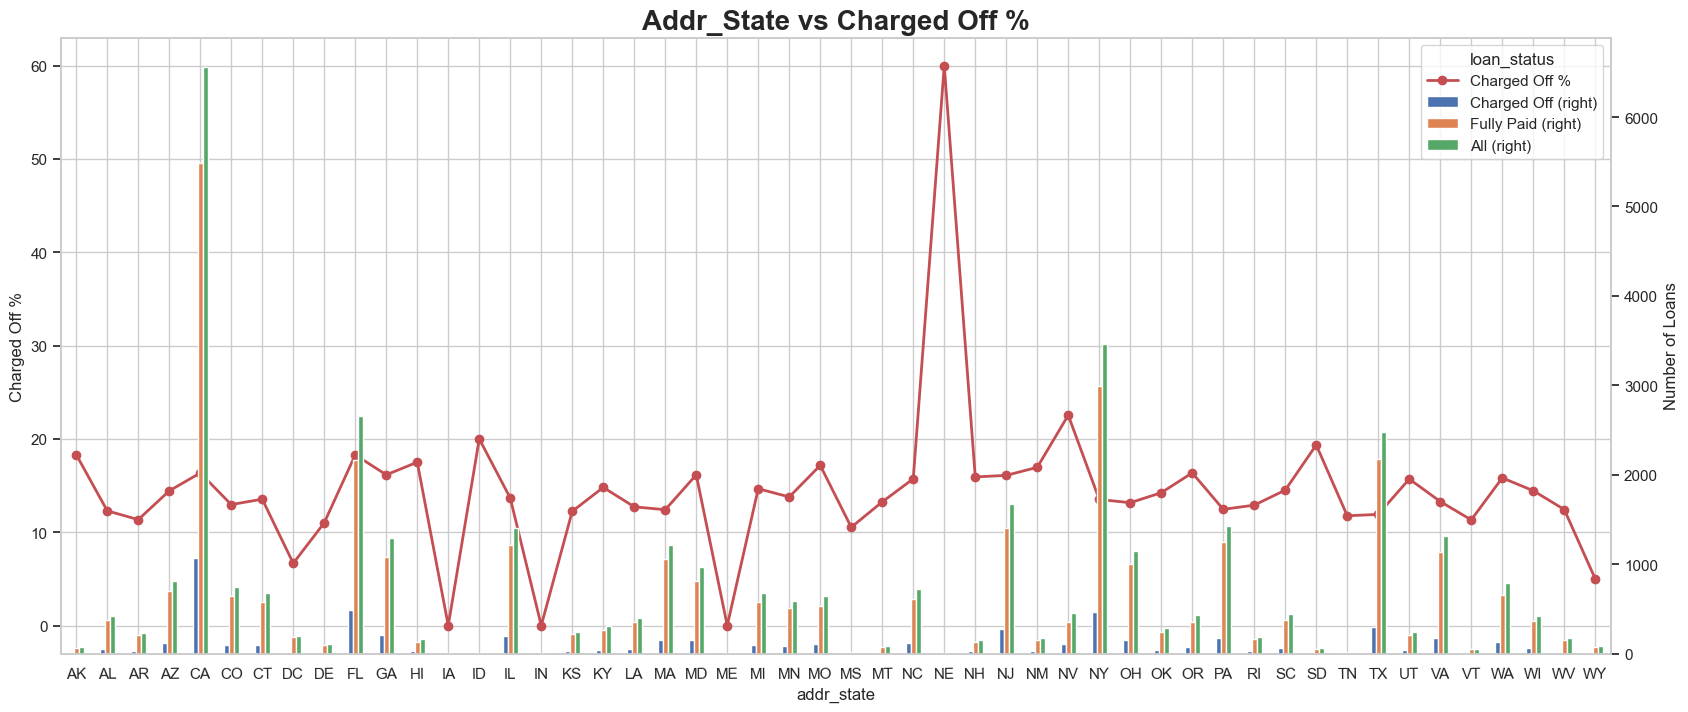

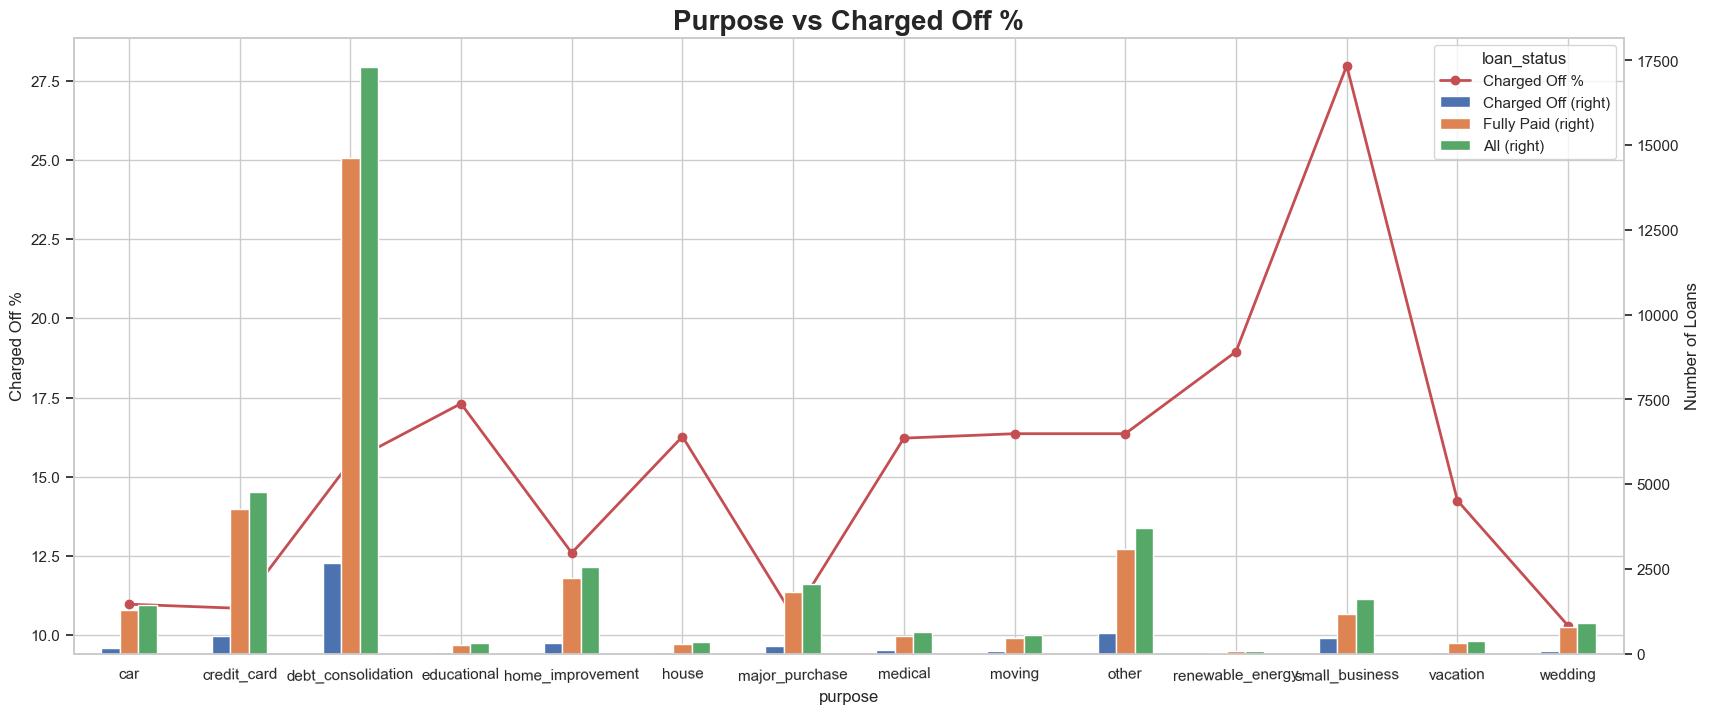

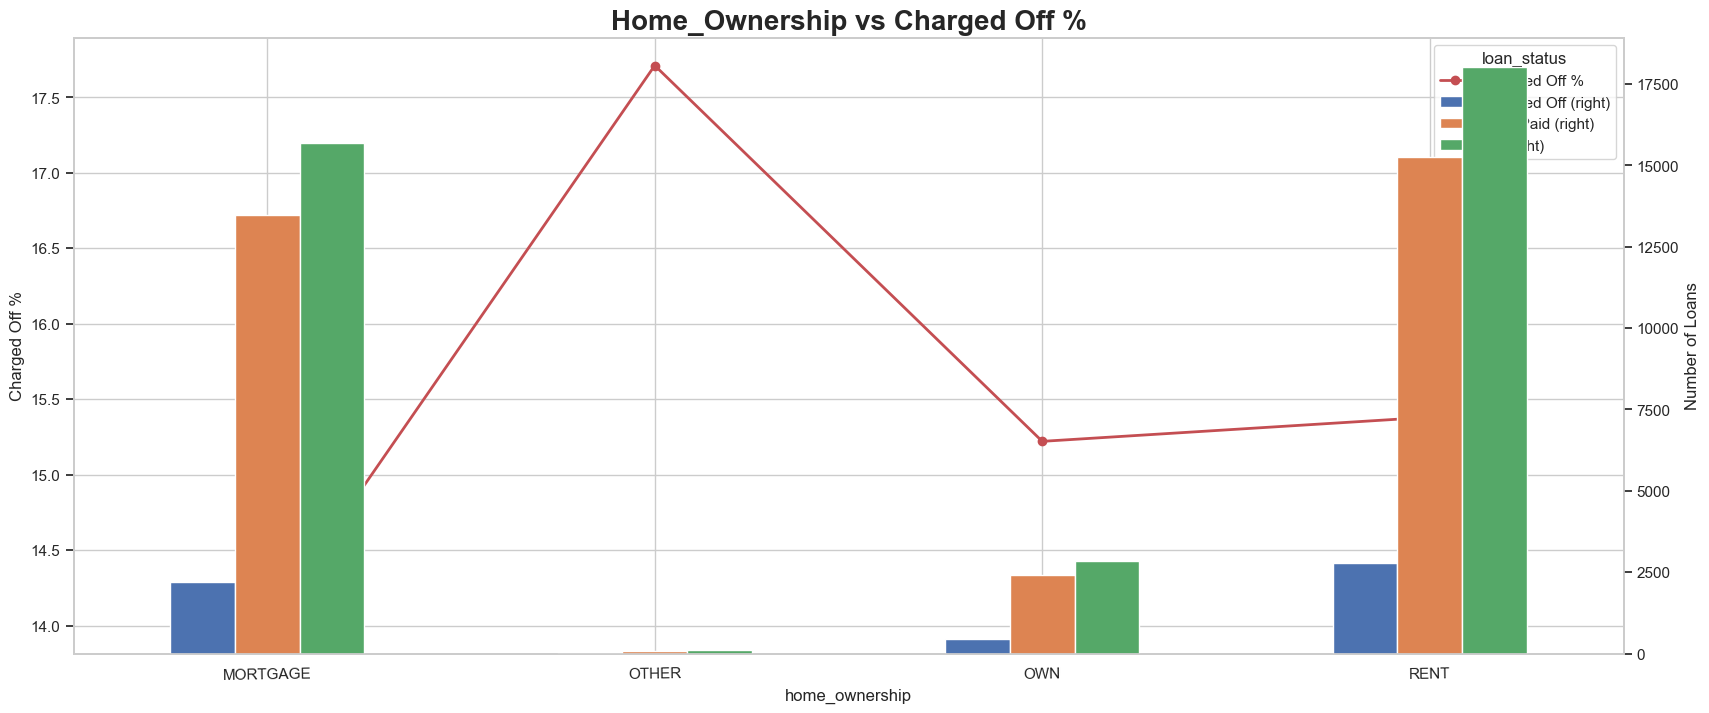

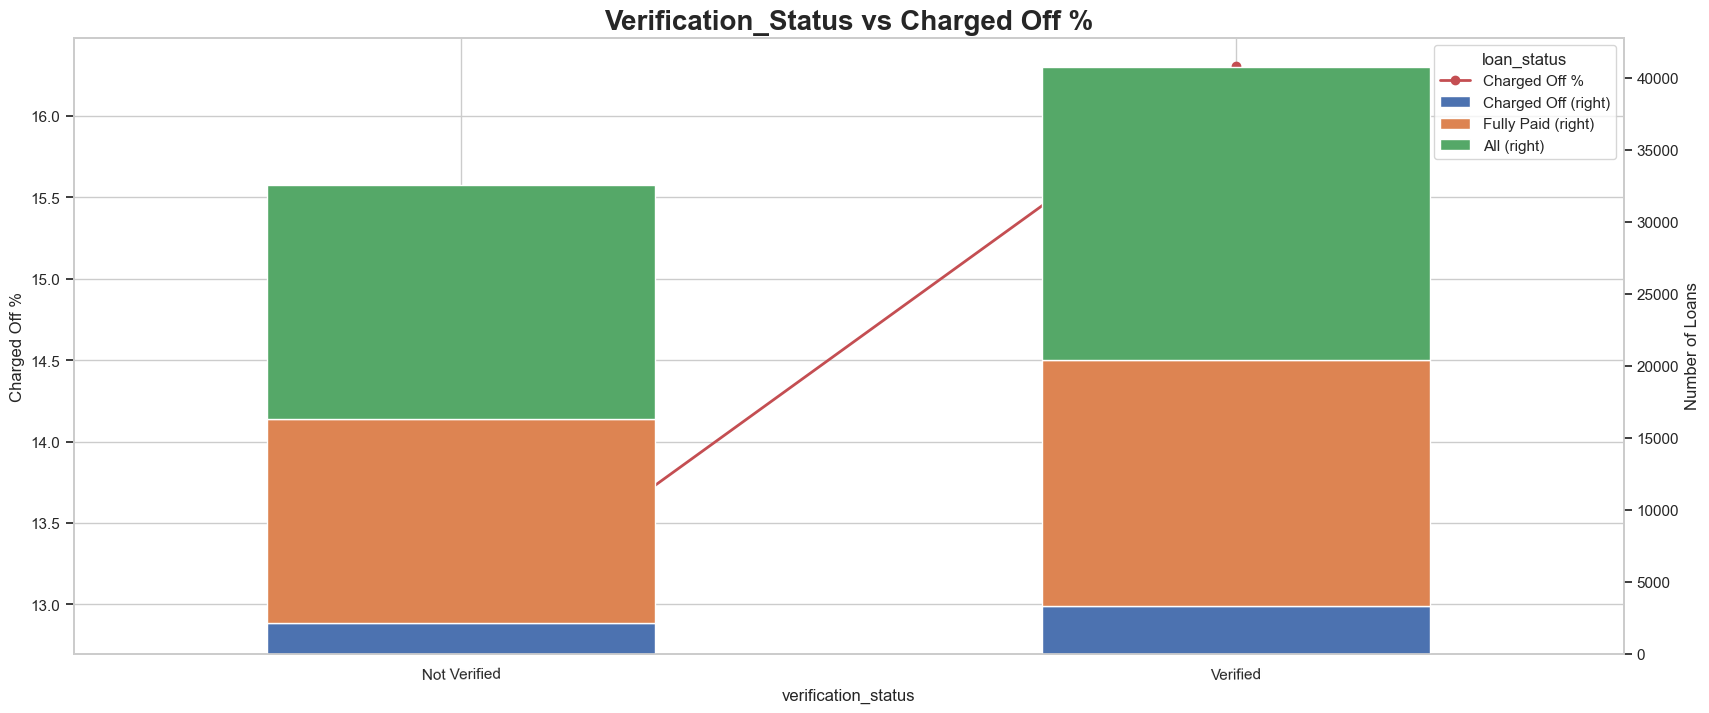

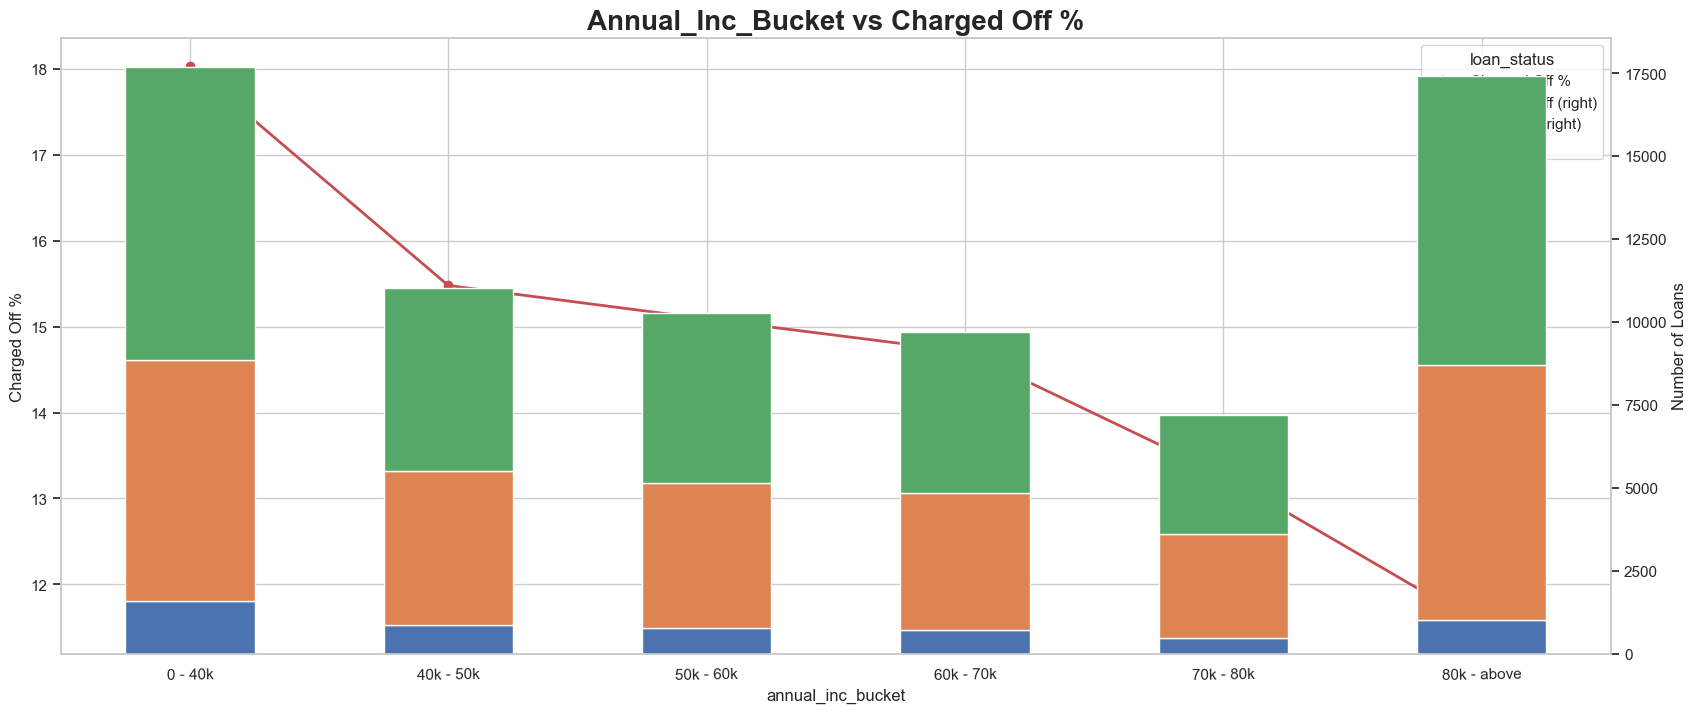

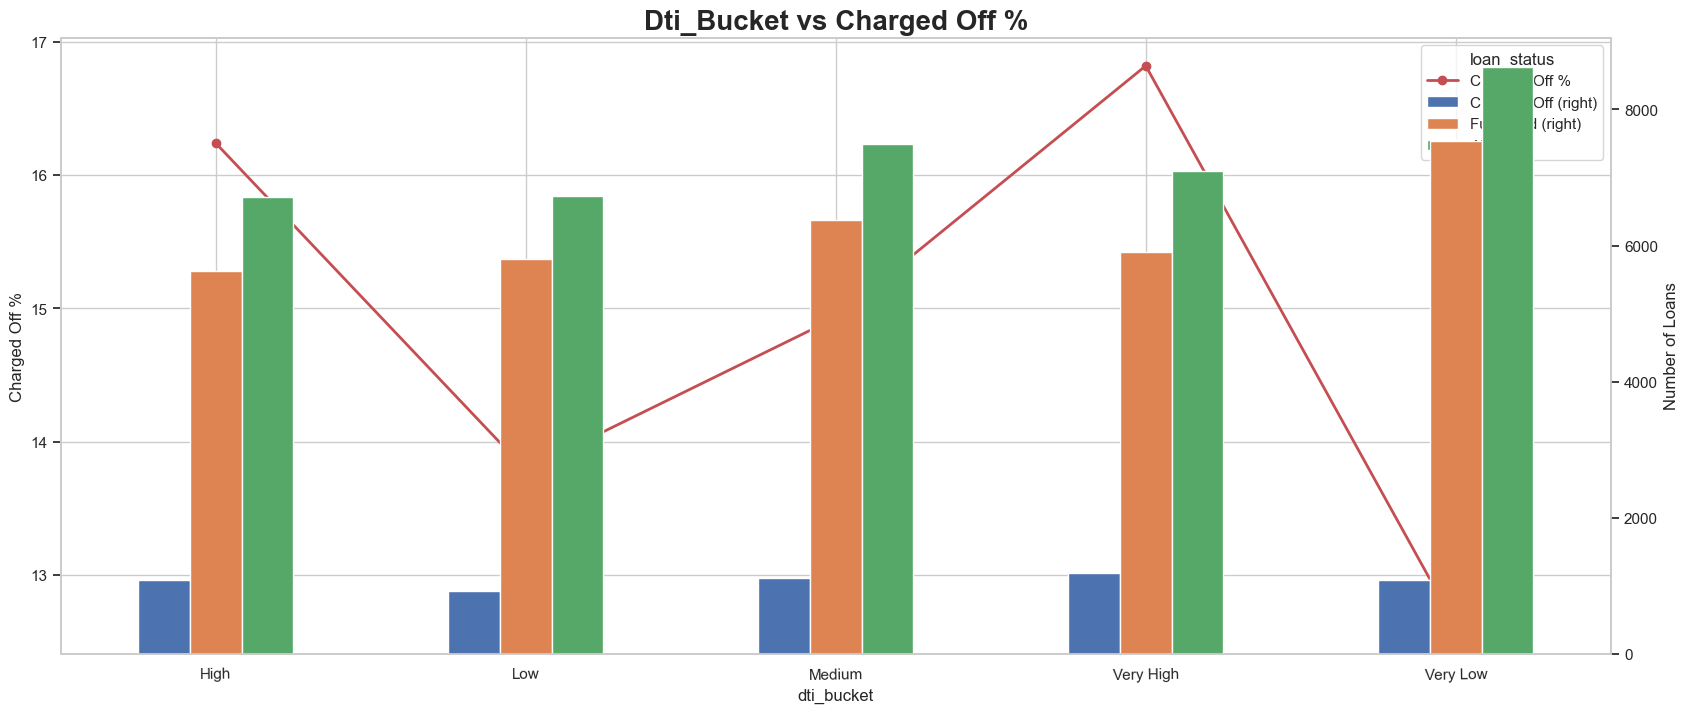

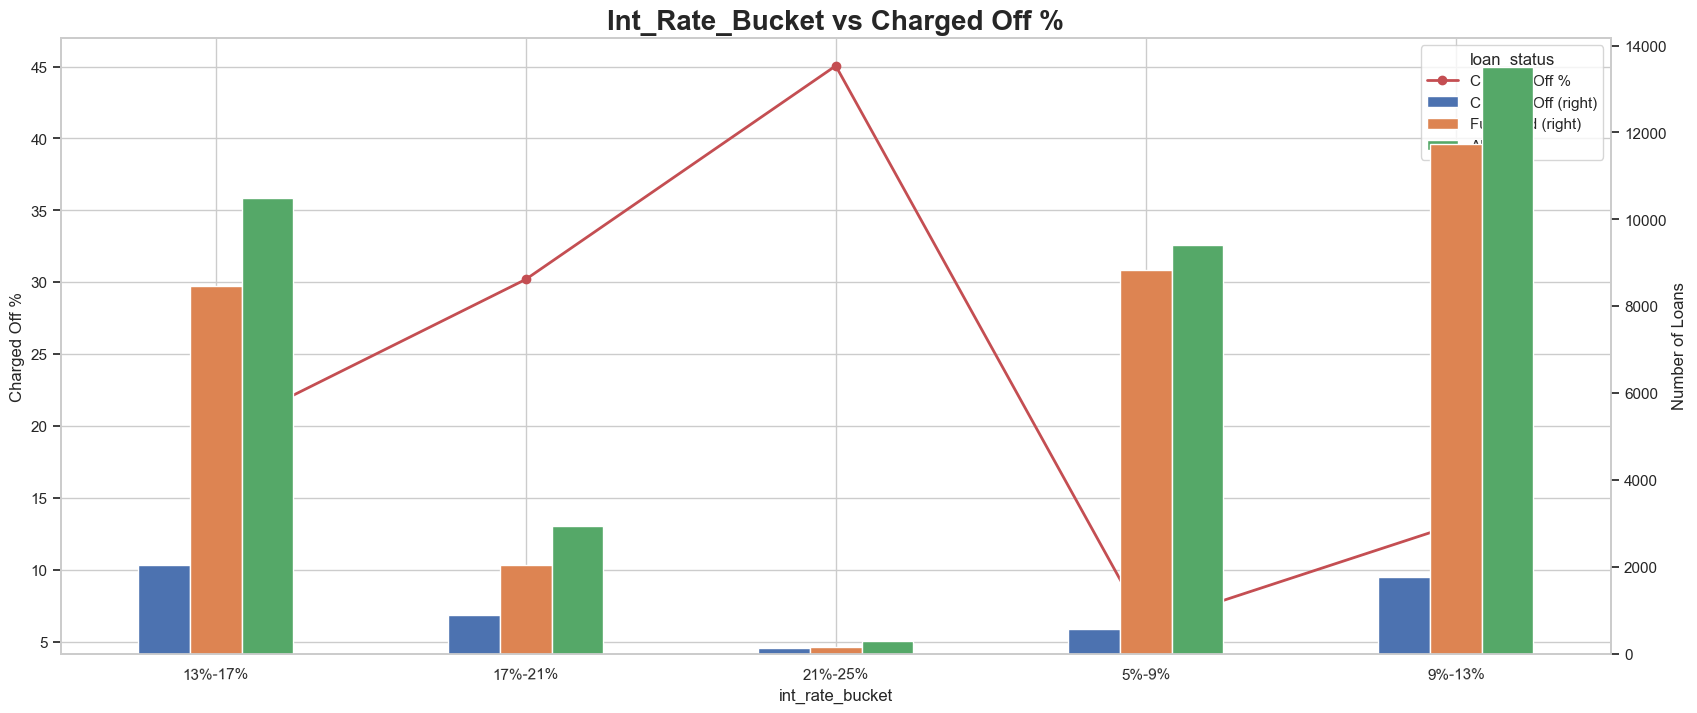

In [646]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(loan_df, column, stacked)


### Summary of Multivariate Analysis

- Tendency to default the loan is likely with loan applicants belonging to B, C, D grades.
- Borrowers from sub grade B3, B4 and B5 have maximum tendency to default.
- Loan applicants with 10 years of experience has maximum tendancy to default the loan.
- Borrowers from states CA, FL, NJ have maximum tendency to deafult the loan.
- Borrowers from Rented House Ownership have highest tendency to default the loan.
- The borrowers who are in lower income groups have maximum tendency to default the loan and it generally decreases with the increase in the annual income.
- The tendency to default the loan is increasing with increase in the interest rate.